**Data source** : https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting

**Reference** : https://www.kaggle.com/avelinocaio/walmart-store-sales-forecasting

## ✍ 그래픽 및 library 호출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
%matplotlib inline

def get_font_family():
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null
        import matplotlib.font_manager as fm
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family
get_font_family()
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당
font_family = get_font_family()
# 폰트설정
plt.rc('font', family=font_family)
# 마이너스폰트 설정
plt.rc('axes', unicode_minus=False)
# 그래프 스타일 설정
plt.style.use('ggplot')
# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## ✍ 데이터 load

In [2]:
features = pd.read_csv('./walmart-recruiting-store-sales-forecasting/features.csv.zip')
train = pd.read_csv('./walmart-recruiting-store-sales-forecasting/train.csv.zip')
stores = pd.read_csv('./walmart-recruiting-store-sales-forecasting/stores.csv')
test = pd.read_csv('./walmart-recruiting-store-sales-forecasting/test.csv.zip')
sample_submission = pd.read_csv('./walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip')

In [3]:
print('features dataframe : ')
display(features.head())
print('')
print('stores dataframe : ')
display(stores.head())
print('')
print('train : ')
display(train.head())

features dataframe : 


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False



stores dataframe : 


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875



train : 


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


## ✍  Exploratory Data Analysis(EDA) & Data Cleansing

### 📌 features.csv 와 stores.csv의 merge를 통해 새로운 데이터셋(feat_sto)를 만든다. 이때 'Store'컬럼을 기준으로 사용한다.

In [4]:
feat_sto = features.merge(stores, how='inner', on='Store')
feat_sto.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


### 📌 날짜 형태 변환 및 Week와 Year 컬럼 추가

In [5]:
feat_sto['Date'] = pd.to_datetime(feat_sto['Date'])
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [6]:
feat_sto['Week'] = feat_sto['Date'].dt.isocalendar()['week']
feat_sto['Year'] = feat_sto['Date'].dt.isocalendar()['year']

In [7]:
feat_sto.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Week,Year
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,2010
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,6,2010
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,7,2010
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,8,2010
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,9,2010


In [8]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


### 📌 train / feat_sto, test / feat_sto을 merge해 새로운 데이터 프레임 train_detail, test_detail을 생성

In [9]:
train_detail = train.merge(right=feat_sto, 
                           how='inner', 
                           on=['Date', 'Store', 'IsHoliday']).sort_values(['Store', 'Dept', 'Date'],).reset_index(drop=True)
train_detail

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,6,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,7,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,8,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,9,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,39,2012
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221,40,2012
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221,41,2012
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221,42,2012


In [10]:
test_detail = test.merge(right=feat_sto, 
                         how='inner', 
                         on=['Date', 'Store', 'IsHoliday']).sort_values(['Store', 'Dept', 'Date'],).reset_index(drop=True)
test_detail

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,2012
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315,45,2012
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315,46,2012
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315,47,2012
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315,48,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,B,118221,26,2013
115060,45,98,2013-07-05,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,B,118221,27,2013
115061,45,98,2013-07-12,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,B,118221,28,2013
115062,45,98,2013-07-19,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,B,118221,29,2013


### 📌 연도별 주간 평균 판매량 그래프

C:\Users\medici\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\medici\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\medici\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\medici\ana

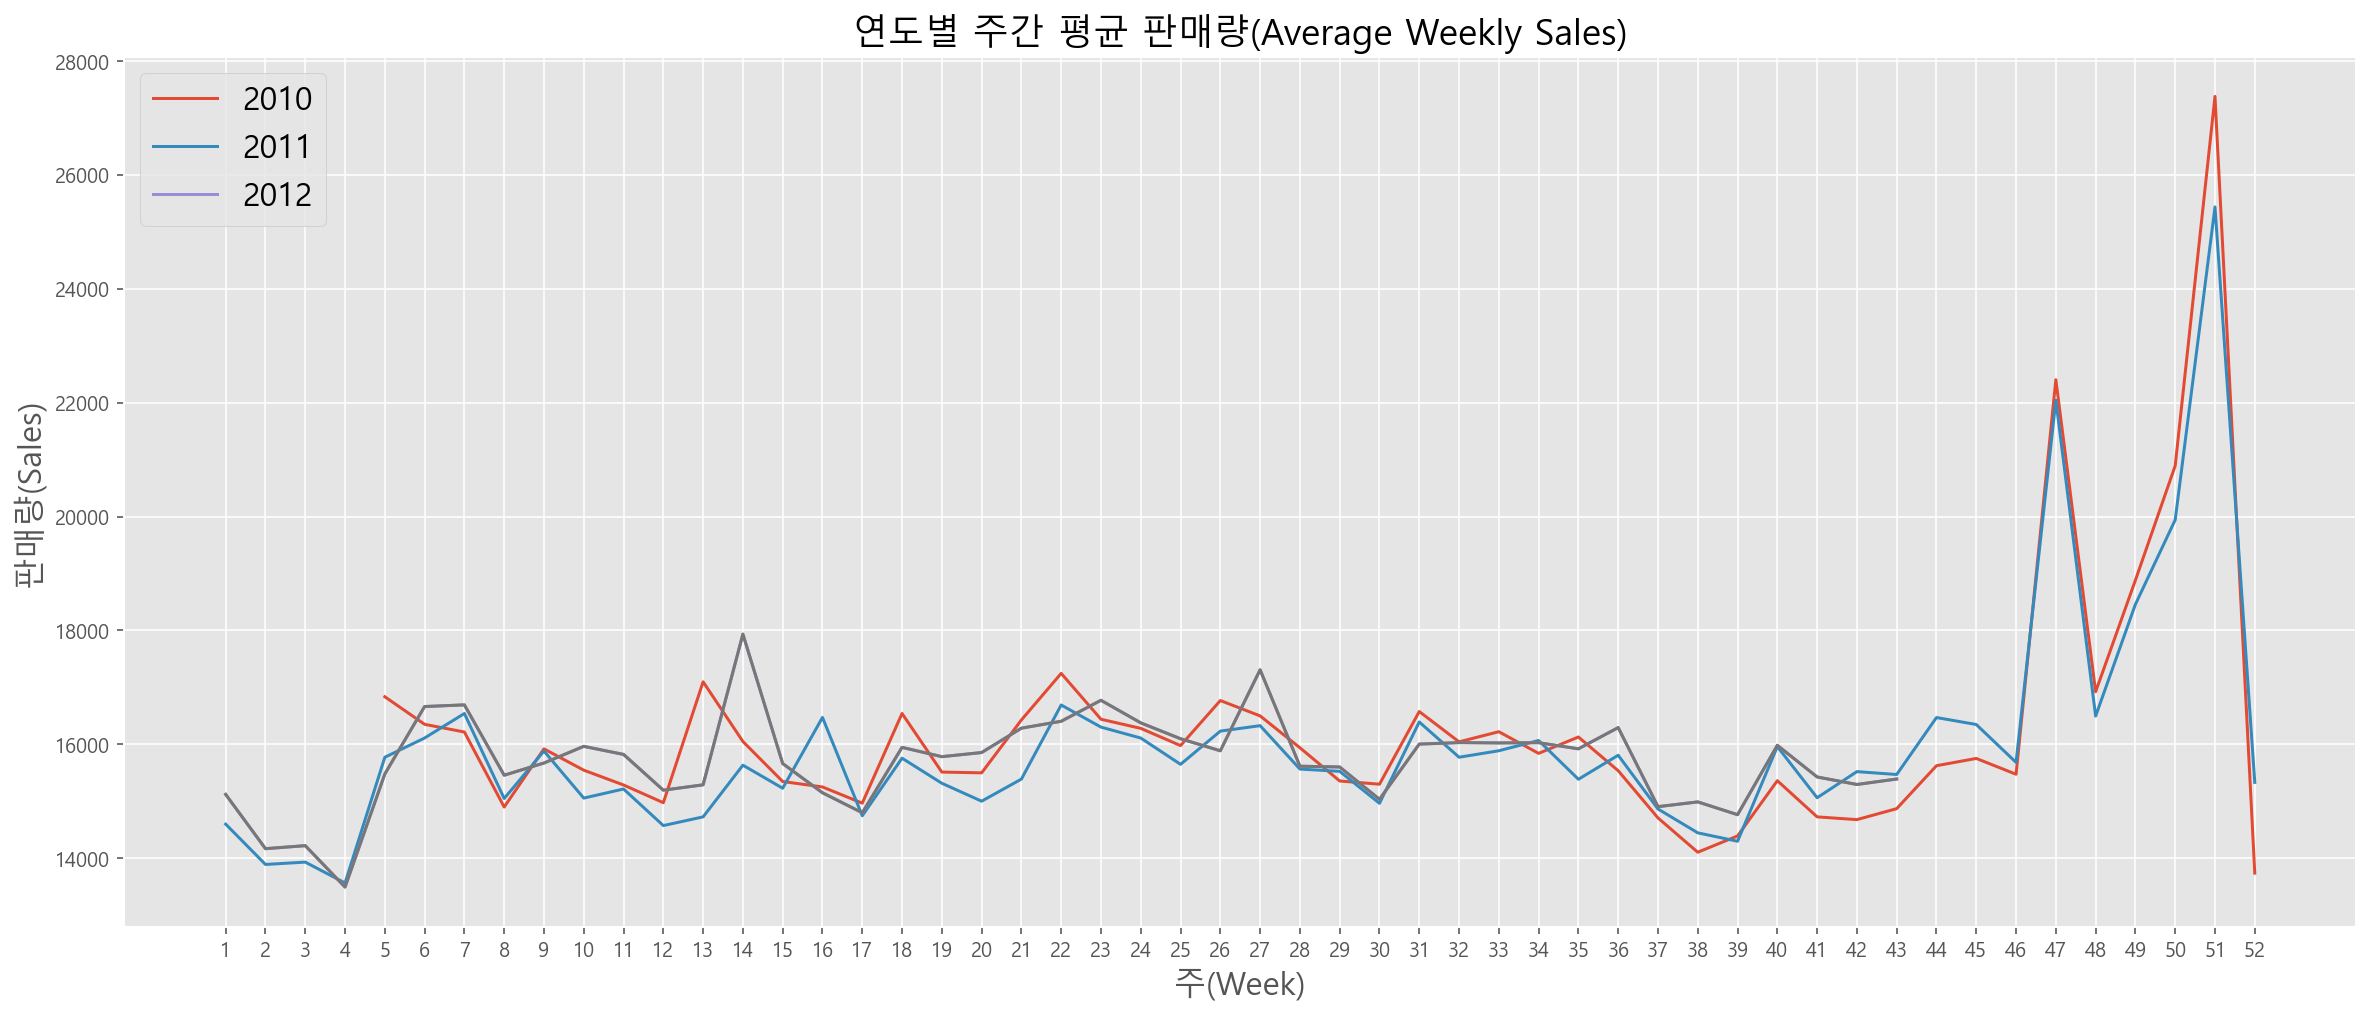

In [11]:
weekly_sales_2010 =  train_detail[train_detail['Year'] == 2010].groupby(['Week']).mean()['Weekly_Sales']
weekly_sales_2011 =  train_detail[train_detail['Year'] == 2011].groupby(['Week']).mean()['Weekly_Sales']
weekly_sales_2012 =  train_detail[train_detail['Year'] == 2012].groupby(['Week']).mean()['Weekly_Sales']
weekly_sales_2013 =  train_detail[train_detail['Year'] == 2012].groupby(['Week']).mean()['Weekly_Sales']

weekly_sales_2010
plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2013.values)

plt.xticks(np.arange(1, 53))
plt.xlabel('주(Week)', fontsize=16)
plt.ylabel('판매량(Sales)', fontsize=16)
plt.legend(['2010', '2011', '2012'], fontsize=16)
plt.title('연도별 주간 평균 판매량(Average Weekly Sales)', fontsize=18)
plt.show()

### 📌 날짜별 판매량 평균값(Mean)과 중앙값(Median) 구해보기

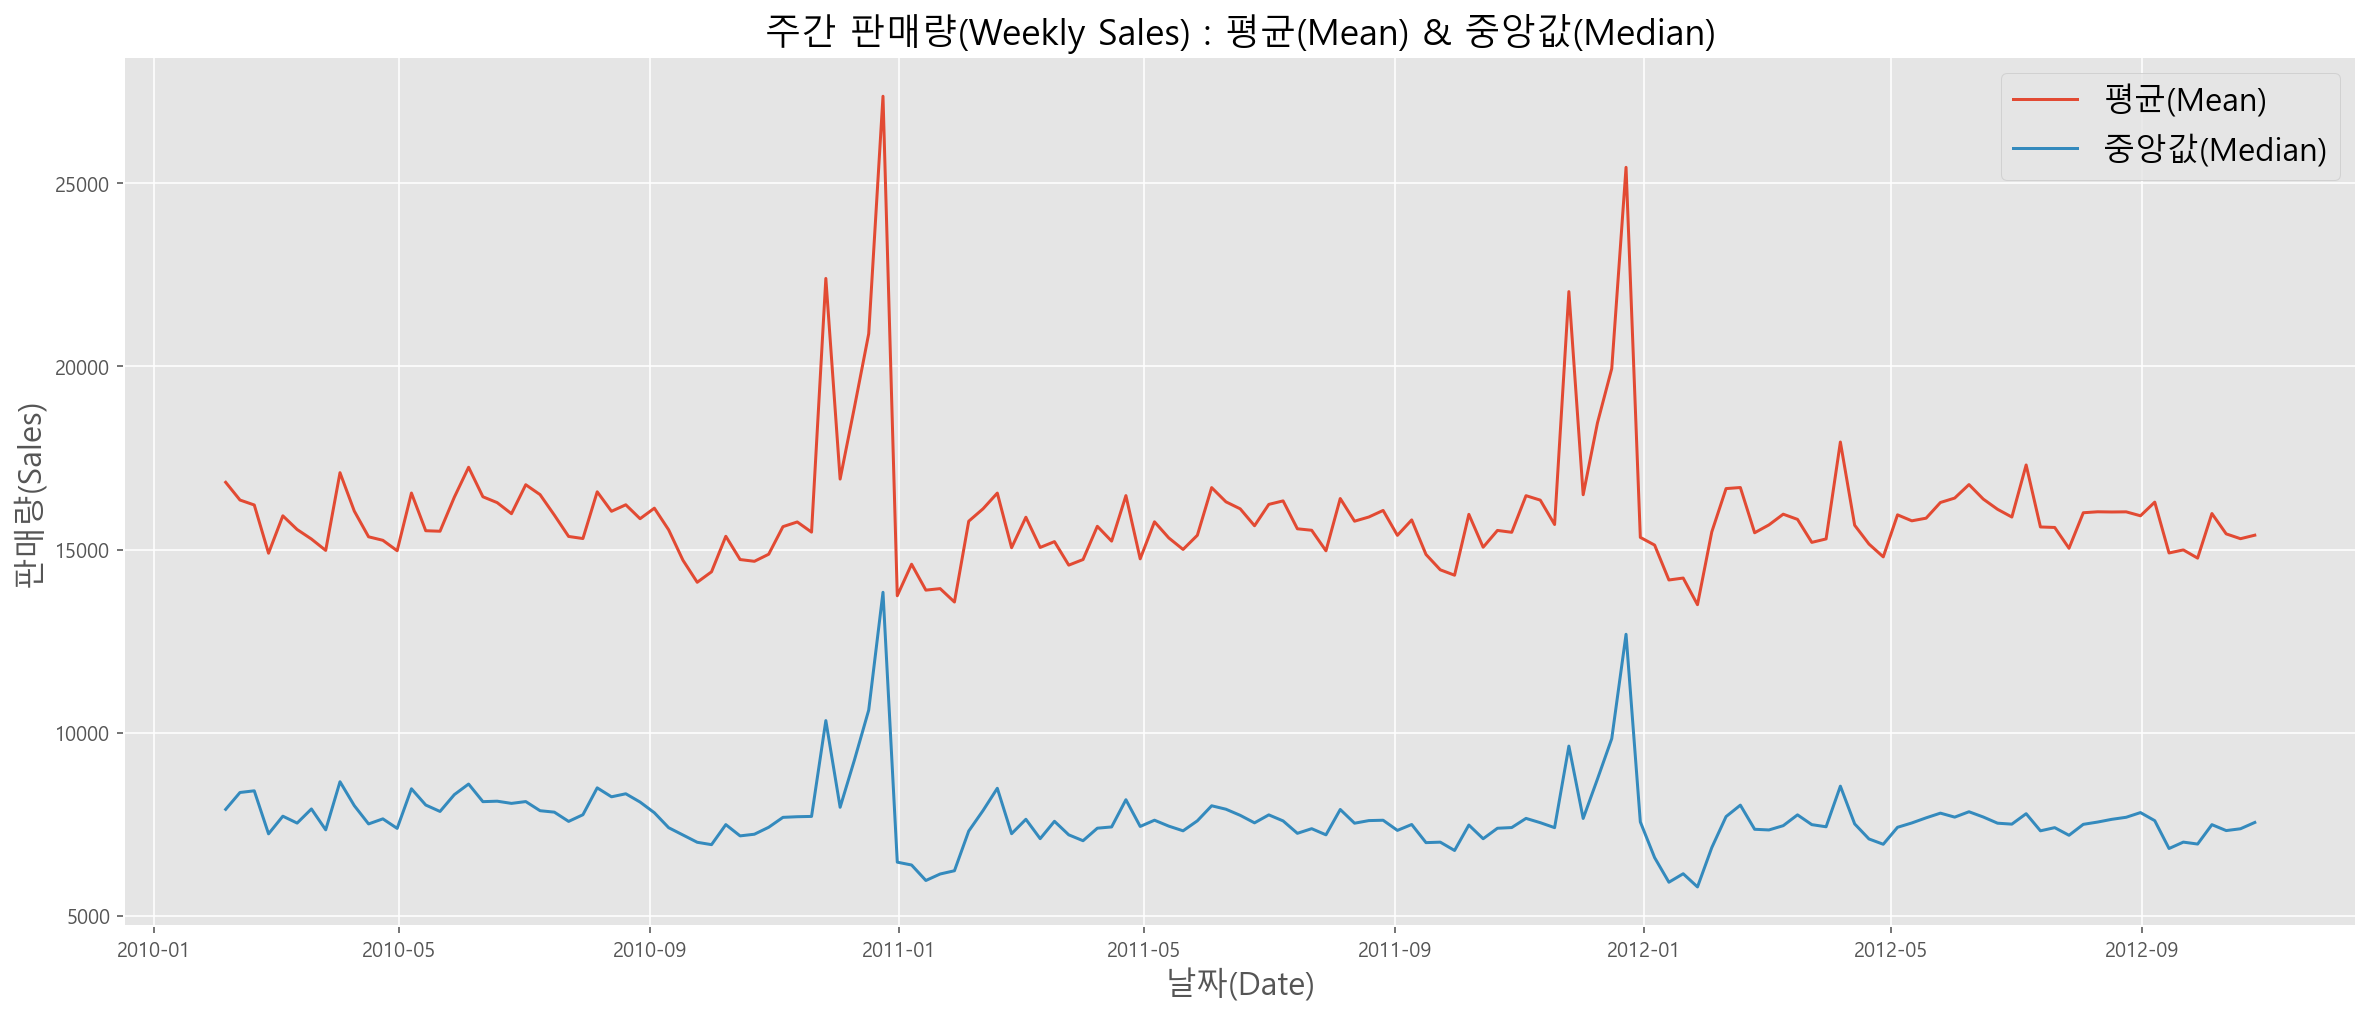

In [12]:
weekly_sales_mean = train_detail['Weekly_Sales'].groupby(train_detail['Date']).mean()
weekly_sales_median = train_detail['Weekly_Sales'].groupby(train_detail['Date']).median()

plt.figure(figsize=(20, 8))
sns.lineplot(data=weekly_sales_mean)
sns.lineplot(data=weekly_sales_median)
plt.xlabel('날짜(Date)', fontsize=16)
plt.ylabel('판매량(Sales)', fontsize=16)
plt.title('주간 판매량(Weekly Sales) : 평균(Mean) & 중앙값(Median)', fontsize=18)
plt.legend(['평균(Mean)', '중앙값(Median)'], fontsize=16)
plt.show()

* 평균값(mean), 중앙값(median)이 서로 다른 모습을 볼 수 있다. 따라서 어떤 상점(store) 또는 부서(department)는 다른 상점보다 훨씬 많이 판매한다는 사실을 알 수 있다.

### 📌 상점별(Store), 부서별(Department)별 평균 판매량(Average Sales)을 살펴본다.

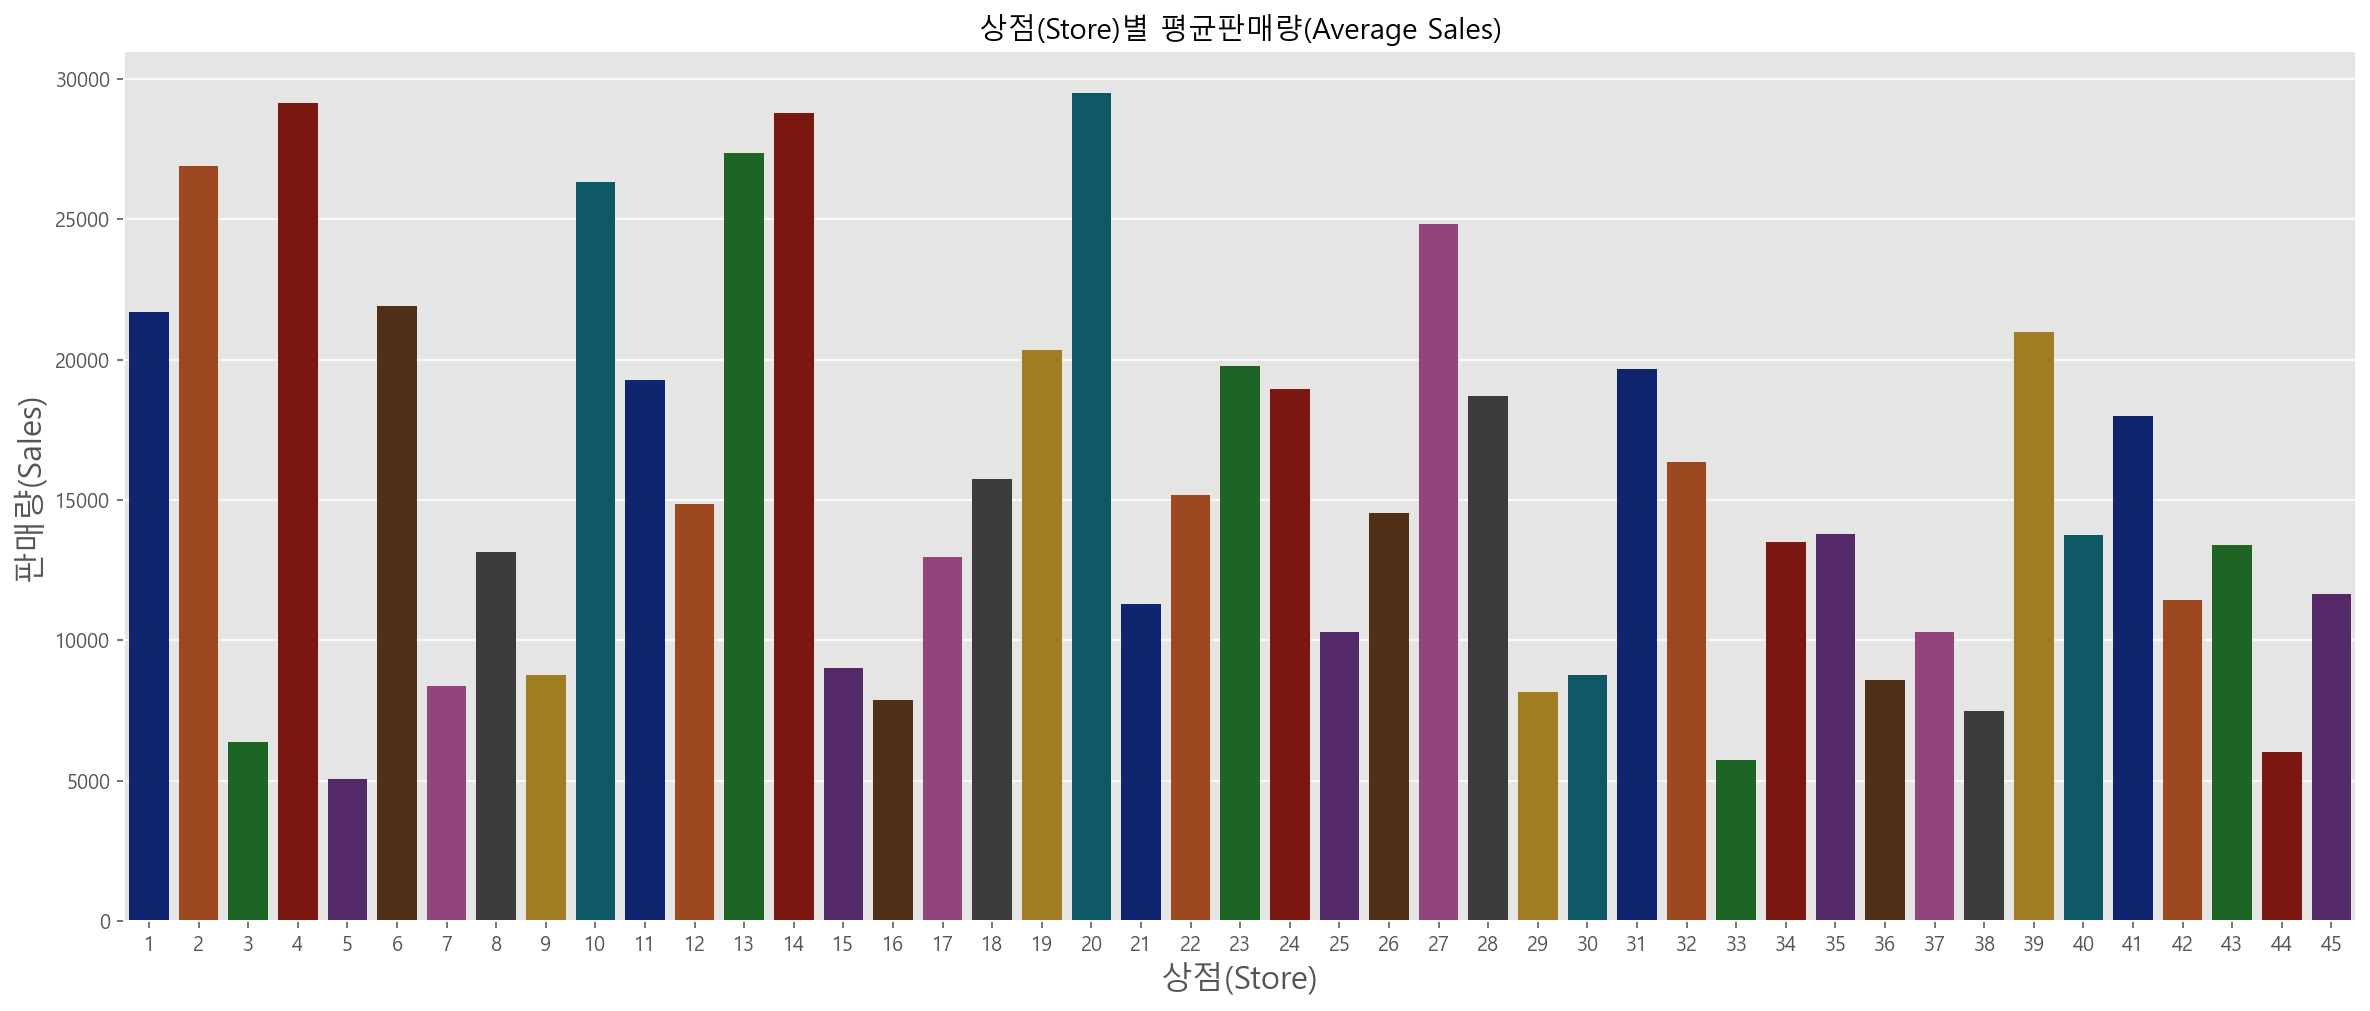

In [13]:
weekly_sales_store = train_detail['Weekly_Sales'].groupby(train_detail['Store']).mean()
plt.figure(figsize=(20, 8))
sns.barplot(x=weekly_sales_store.index, y=weekly_sales_store, palette='dark')
plt.xlabel('상점(Store)', fontsize=16)
plt.ylabel('판매량(Sales)', fontsize=16)
plt.title('상점(Store)별 평균판매량(Average Sales)')
plt.show()

* 상점별로 판매량이 다른것을 확인할 수 있다.

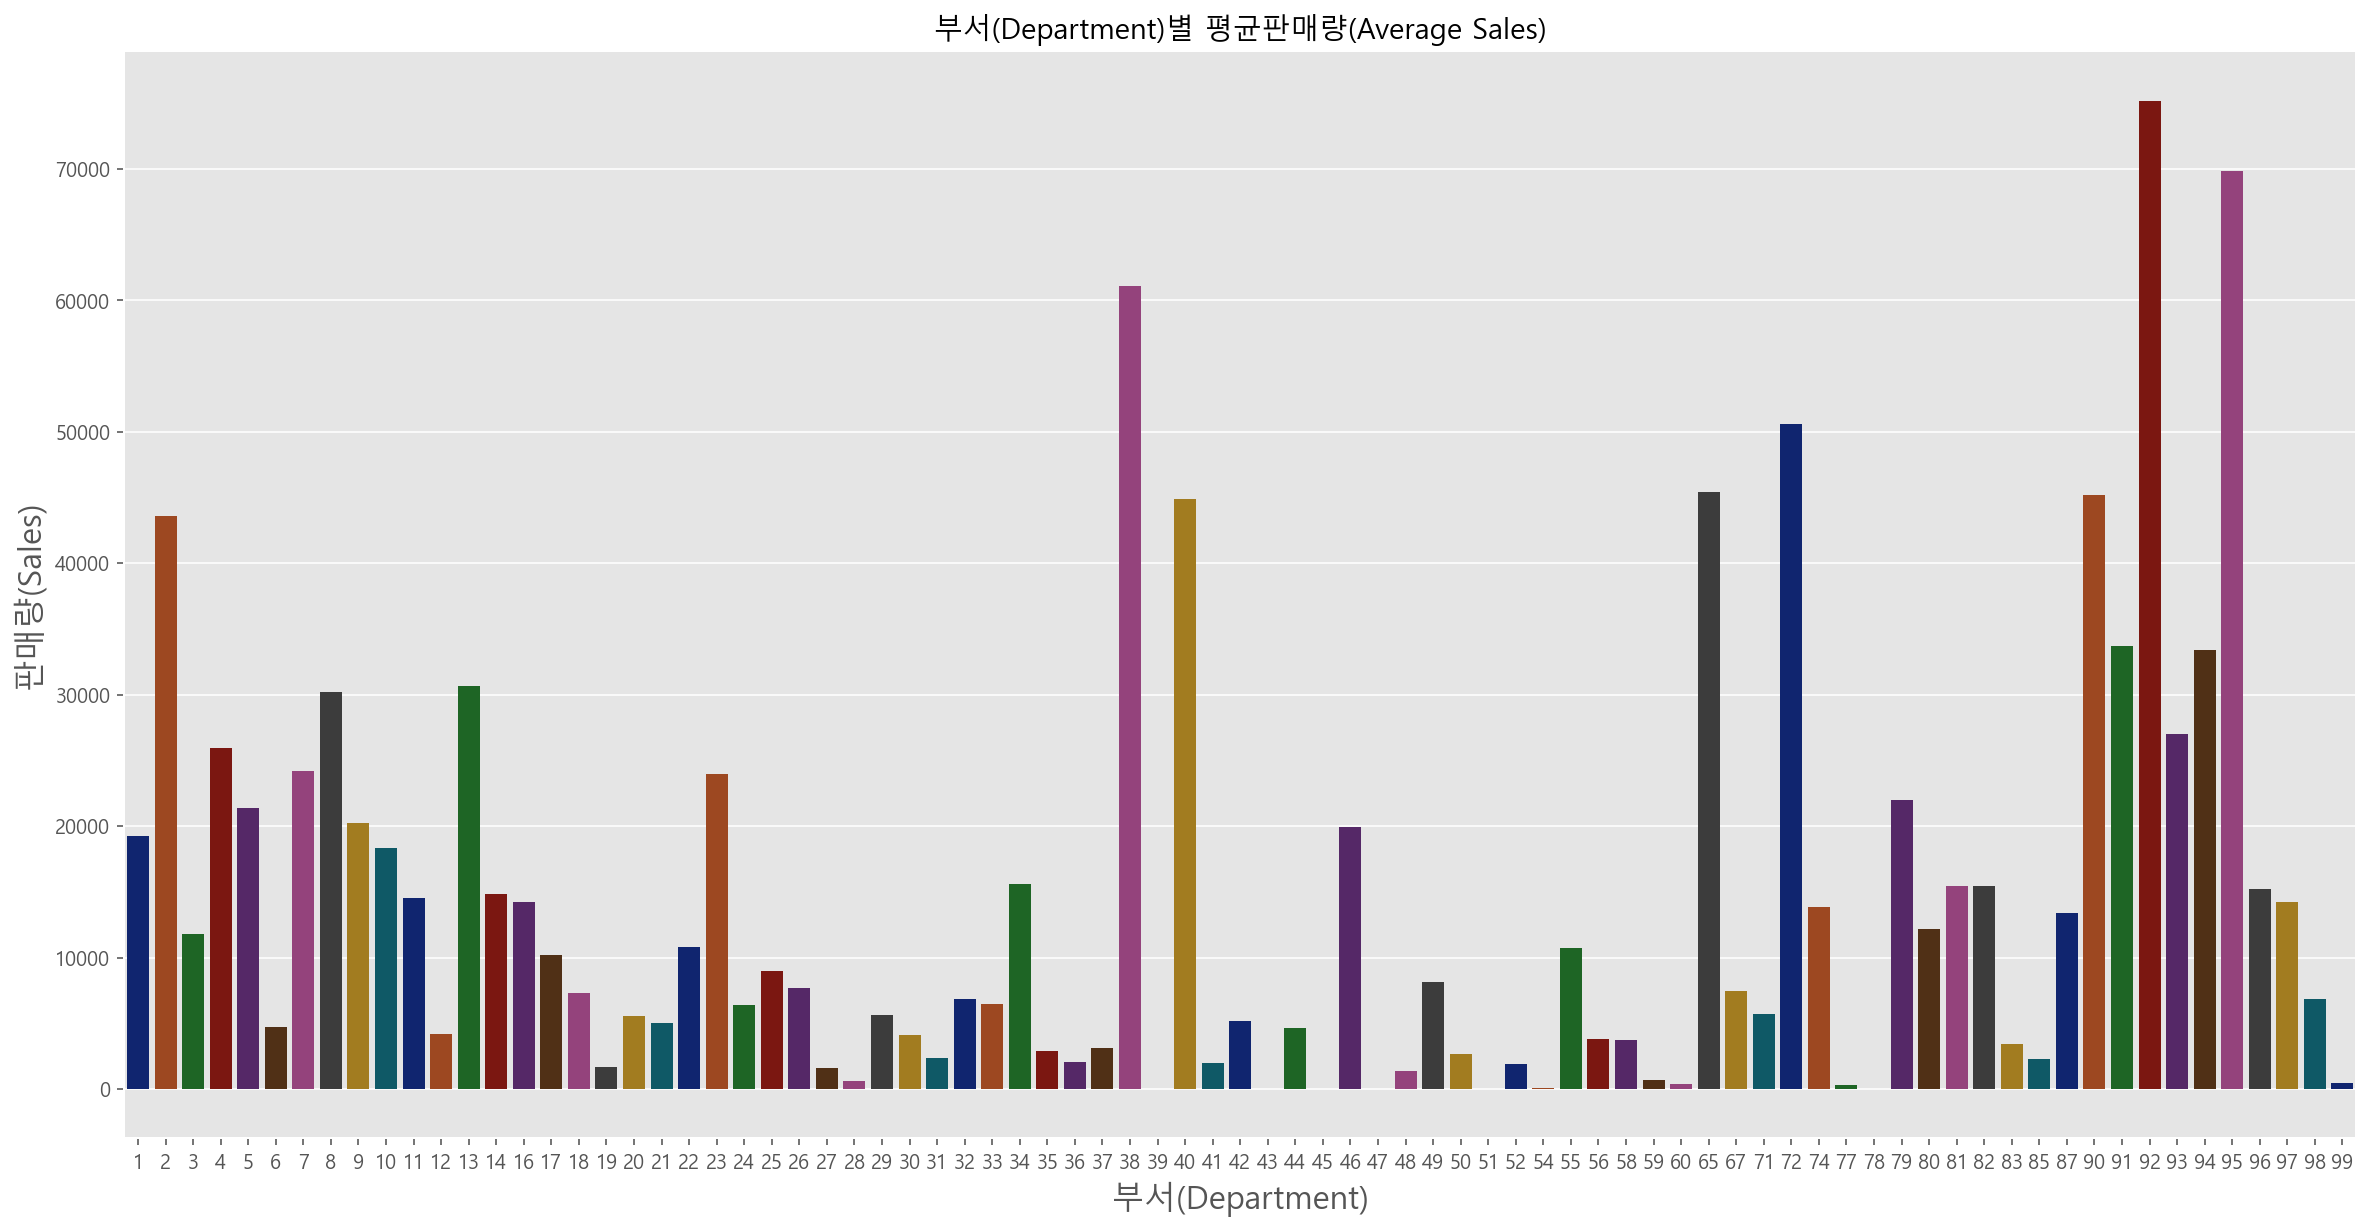

In [14]:
weekly_sales_store = train_detail['Weekly_Sales'].groupby(train_detail['Dept']).mean()
plt.figure(figsize=(20, 10))
sns.barplot(x=weekly_sales_store.index, y=weekly_sales_store, palette='dark')
plt.xlabel('부서(Department)', fontsize=16)
plt.ylabel('판매량(Sales)', fontsize=16)
plt.title('부서(Department)별 평균판매량(Average Sales)')
plt.show()

* 부서별로 판매량이 다른것을 확인할 수 있다.

### 📌 상관 분석(Correlation Analysis)
1. 0 : 전혀 연관관계가 있다.
2. 0-0.3 : 약간 연관관계를 갖고 있다.
3. 0.3-0.7 : 중간정도의 연관관계를 갖고 있다.
4. 0.7-1 : 강한 상관관계를 갖고 있다.

In [15]:
train_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

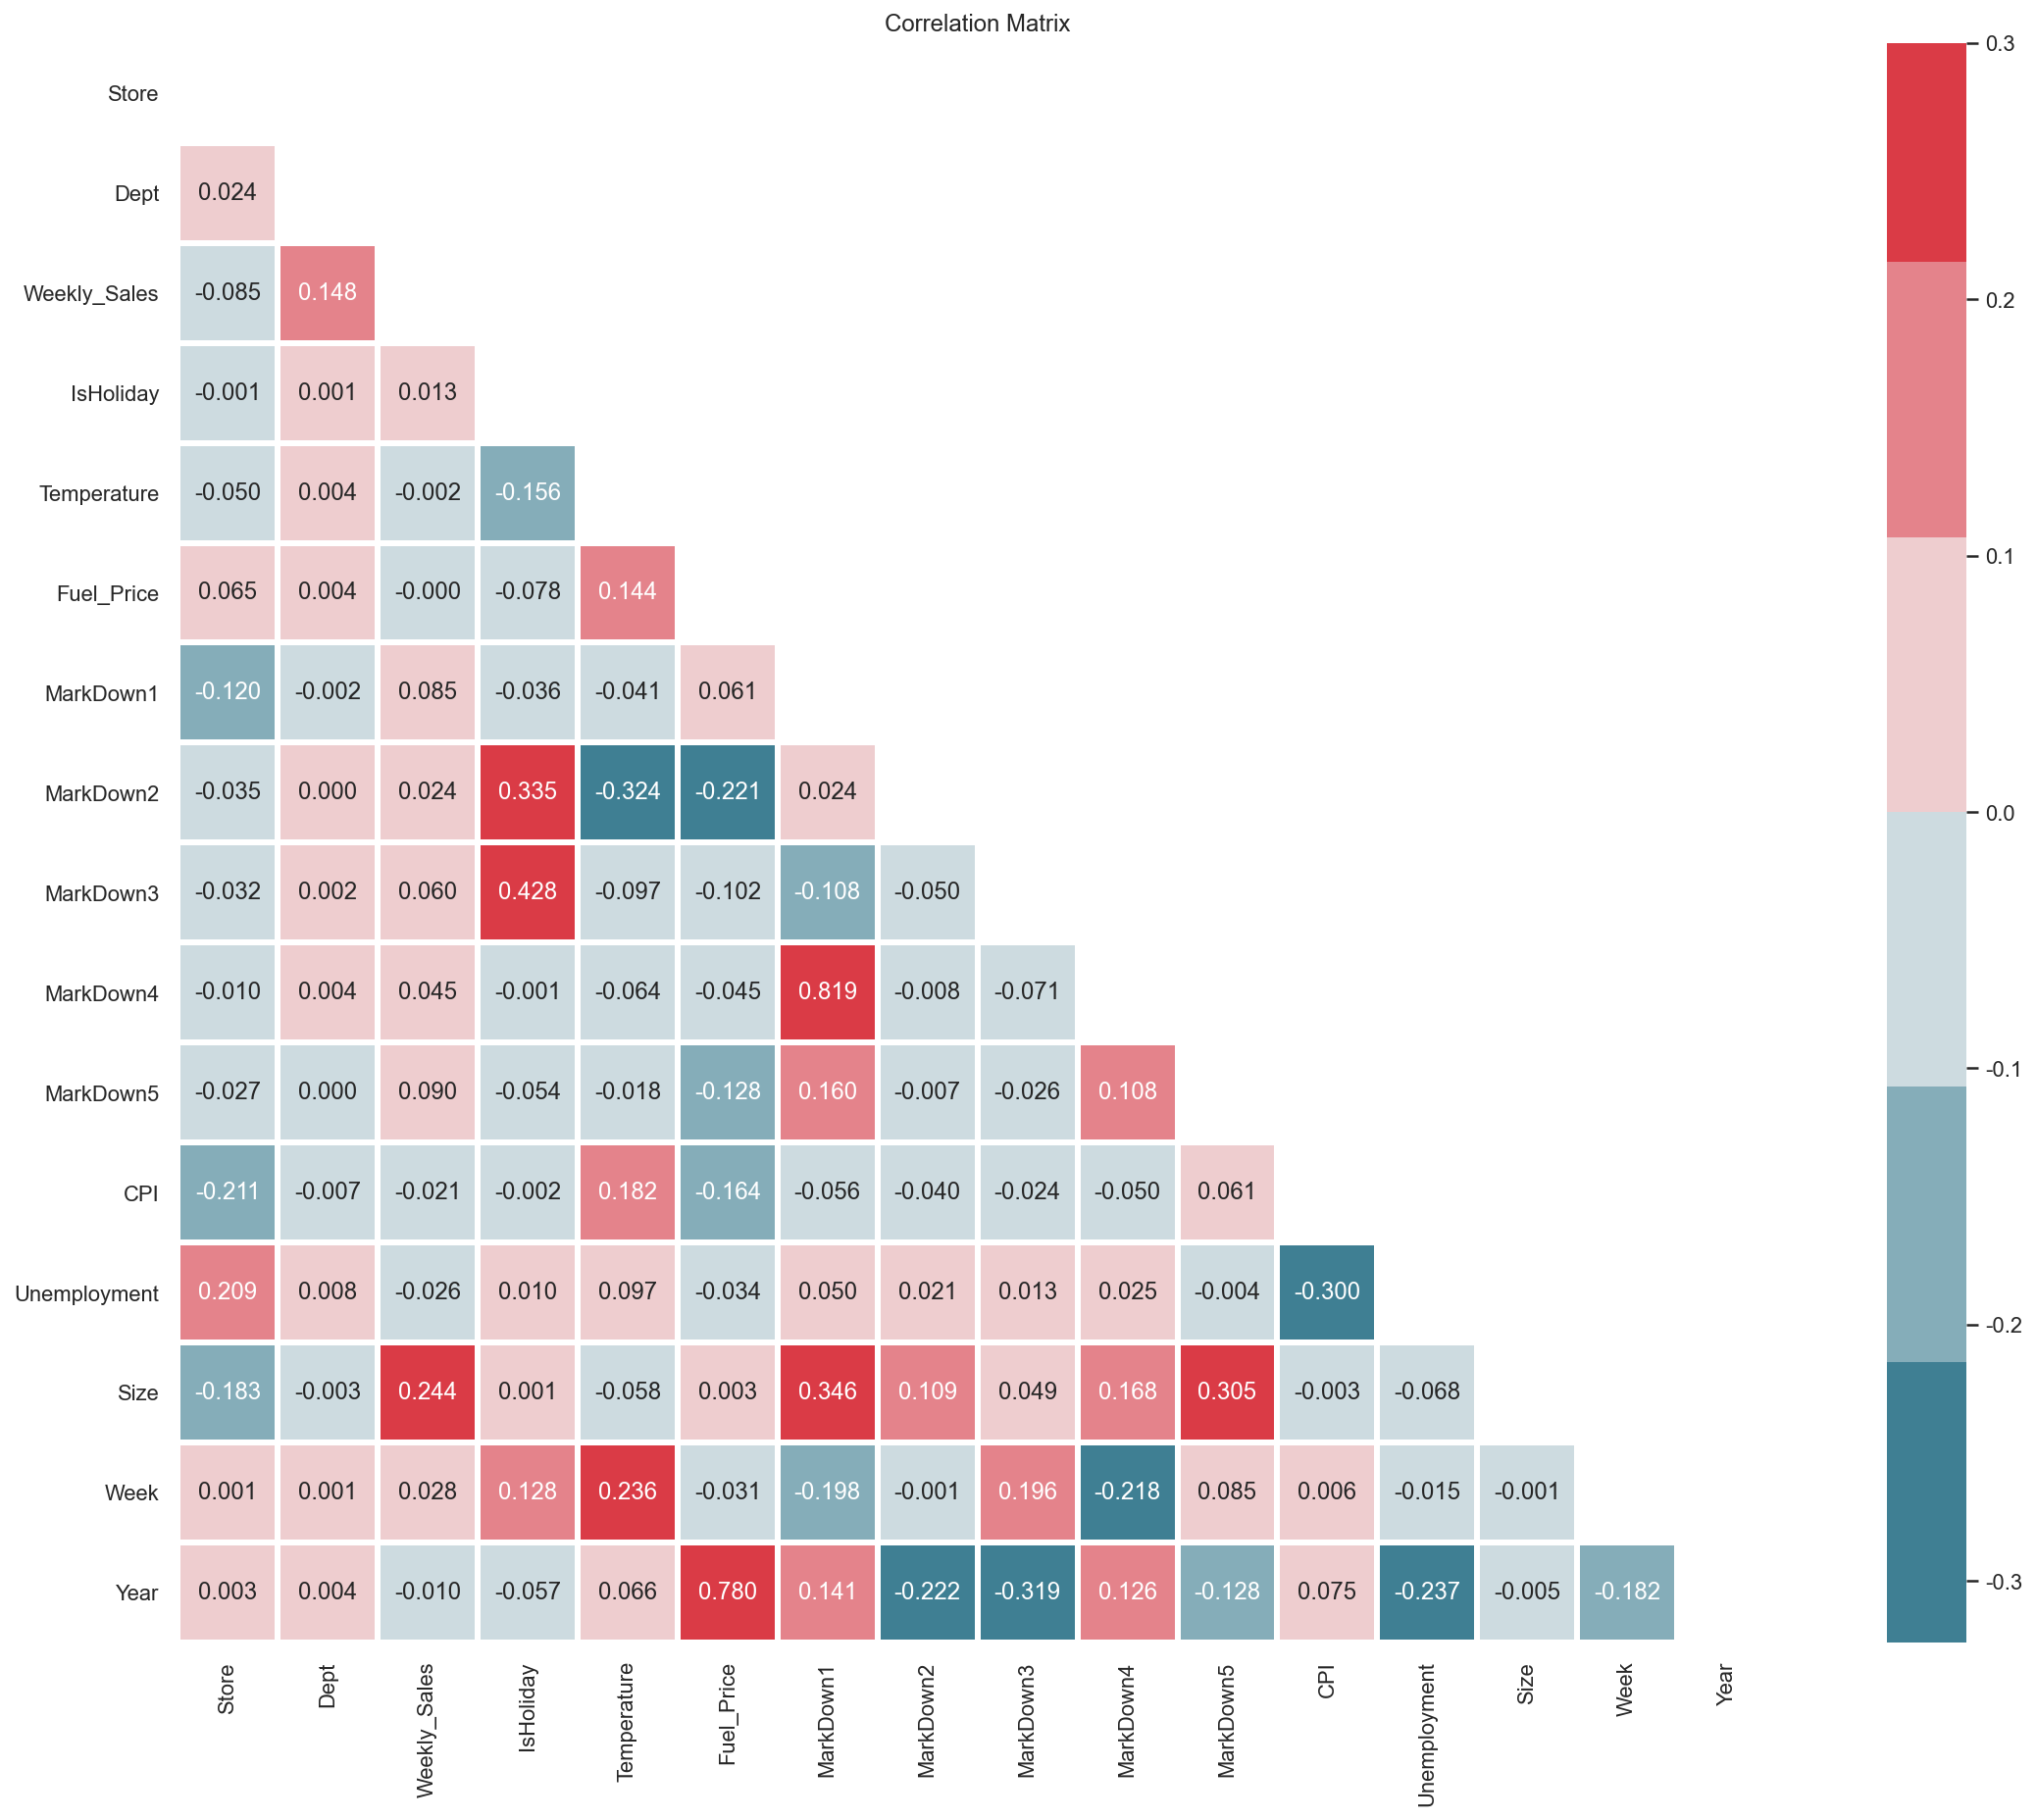

In [16]:
plt.figure(figsize=(20,15))
sns.set(style='white')
corr = train_detail.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=False)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=2.5, annot=True, fmt='.3f')
plt.title('Correlation Matrix', fontsize=12)
plt.show()

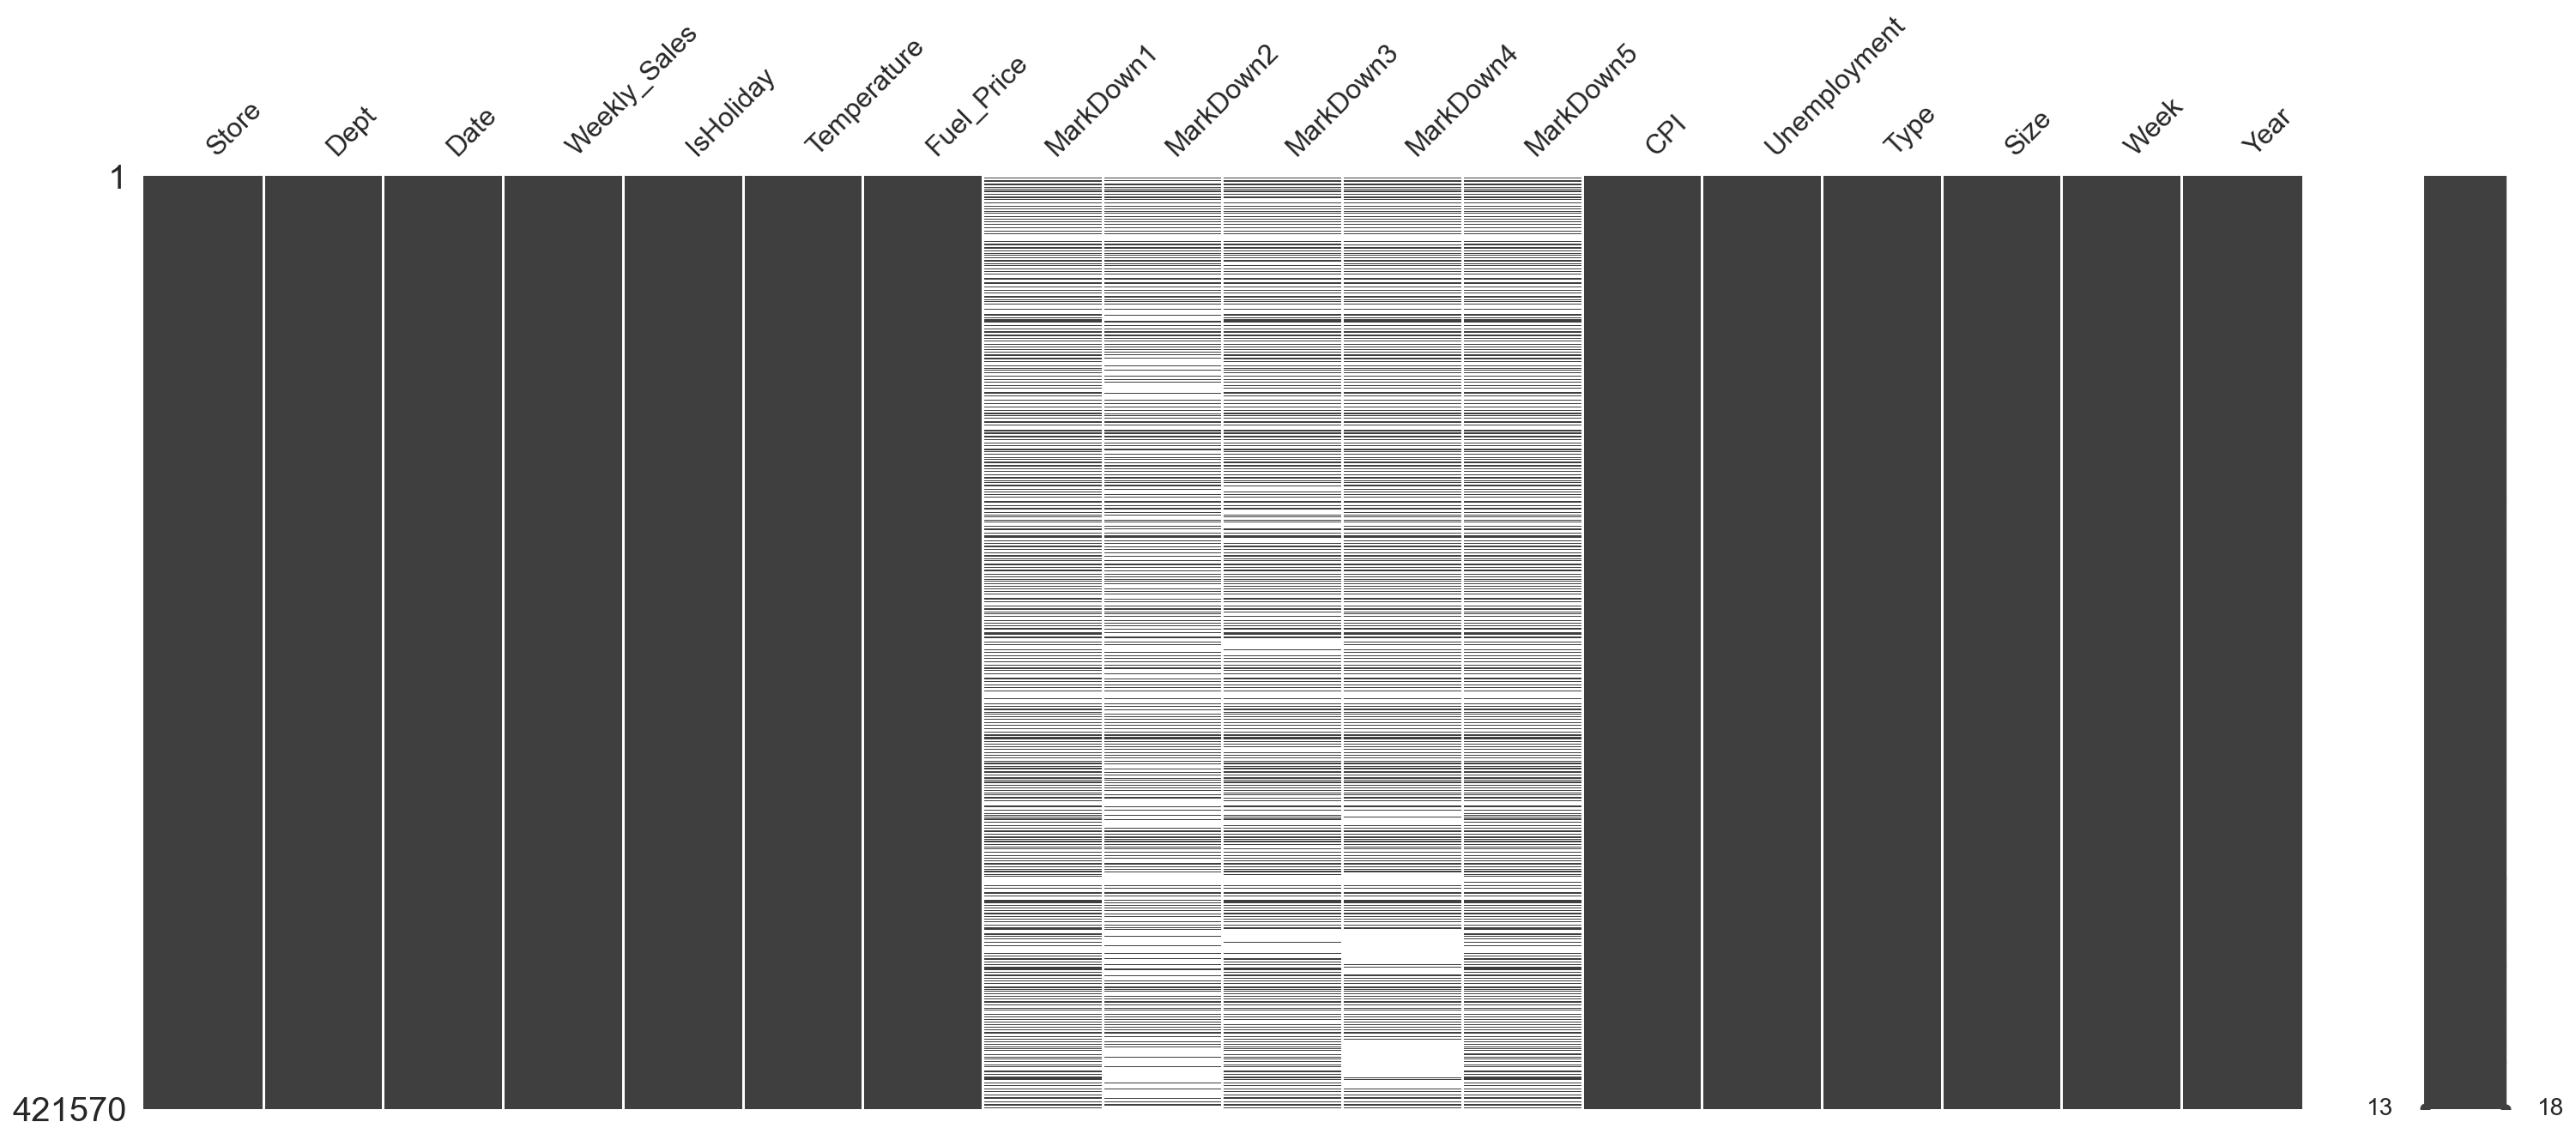

In [17]:
import missingno as msn
msn.matrix(train_detail)
plt.show()

* MarkDown1~5는 결측치가 너무 많은 뿐더러 Weekly_Sales와 크게 상관관계가 없으므로 제거한다.
* Fuel_Price 역시 Weekly_Sales와 상관관계가 적다.

### 📌 Markdown Feature들과 Fuel_Price Feature 제거

In [18]:
train_detail.drop(columns=[f'MarkDown{i}' for i in range(1, 6)]+['Fuel_Price'], inplace=True)
test_detail.drop(columns=[f'MarkDown{i}' for i in range(1, 6)]+['Fuel_Price'], inplace=True)

In [19]:
train_detail

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2010-02-05,24924.50,False,42.31,211.096358,8.106,A,151315,5,2010
1,1,1,2010-02-12,46039.49,True,38.51,211.242170,8.106,A,151315,6,2010
2,1,1,2010-02-19,41595.55,False,39.93,211.289143,8.106,A,151315,7,2010
3,1,1,2010-02-26,19403.54,False,46.63,211.319643,8.106,A,151315,8,2010
4,1,1,2010-03-05,21827.90,False,46.50,211.350143,8.106,A,151315,9,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,192.013558,8.684,B,118221,39,2012
421566,45,98,2012-10-05,628.10,False,64.89,192.170412,8.667,B,118221,40,2012
421567,45,98,2012-10-12,1061.02,False,54.47,192.327265,8.667,B,118221,41,2012
421568,45,98,2012-10-19,760.01,False,56.47,192.330854,8.667,B,118221,42,2012


### 📌 Feature들 더 자세히 분석하기
* discrete plot : boxplot 및 stripplot
* coninuous plot : regplot

In [41]:
def make_discrete_plot(df, x_feature, y_feature):
    fig = plt.figure(figsize=(20, 8))
    gs = GridSpec(1, 2)
    sns.boxplot(data=df, y=y_feature, x=x_feature, ax=fig.add_subplot(gs[0, 0]))
    plt.xlabel(x_feature, fontsize=16)
    plt.ylabel(y_feature, fontsize=16)
    sns.stripplot(data=df, y=y_feature, x=x_feature, ax=fig.add_subplot(gs[0, 1]))
    plt.xlabel(x_feature, fontsize=16)
    plt.ylabel(y_feature, fontsize=16)
    plt.show()
def make_continuous_plot(df, x_feature, y_feature):
    fig = plt.figure(figsize=(18, 15))
    sns.regplot(data=df, x=x_feature, y=y_feature, color='green')
    plt.show()

#### Holiday 와 Weekly_Sales 상관관계 분석

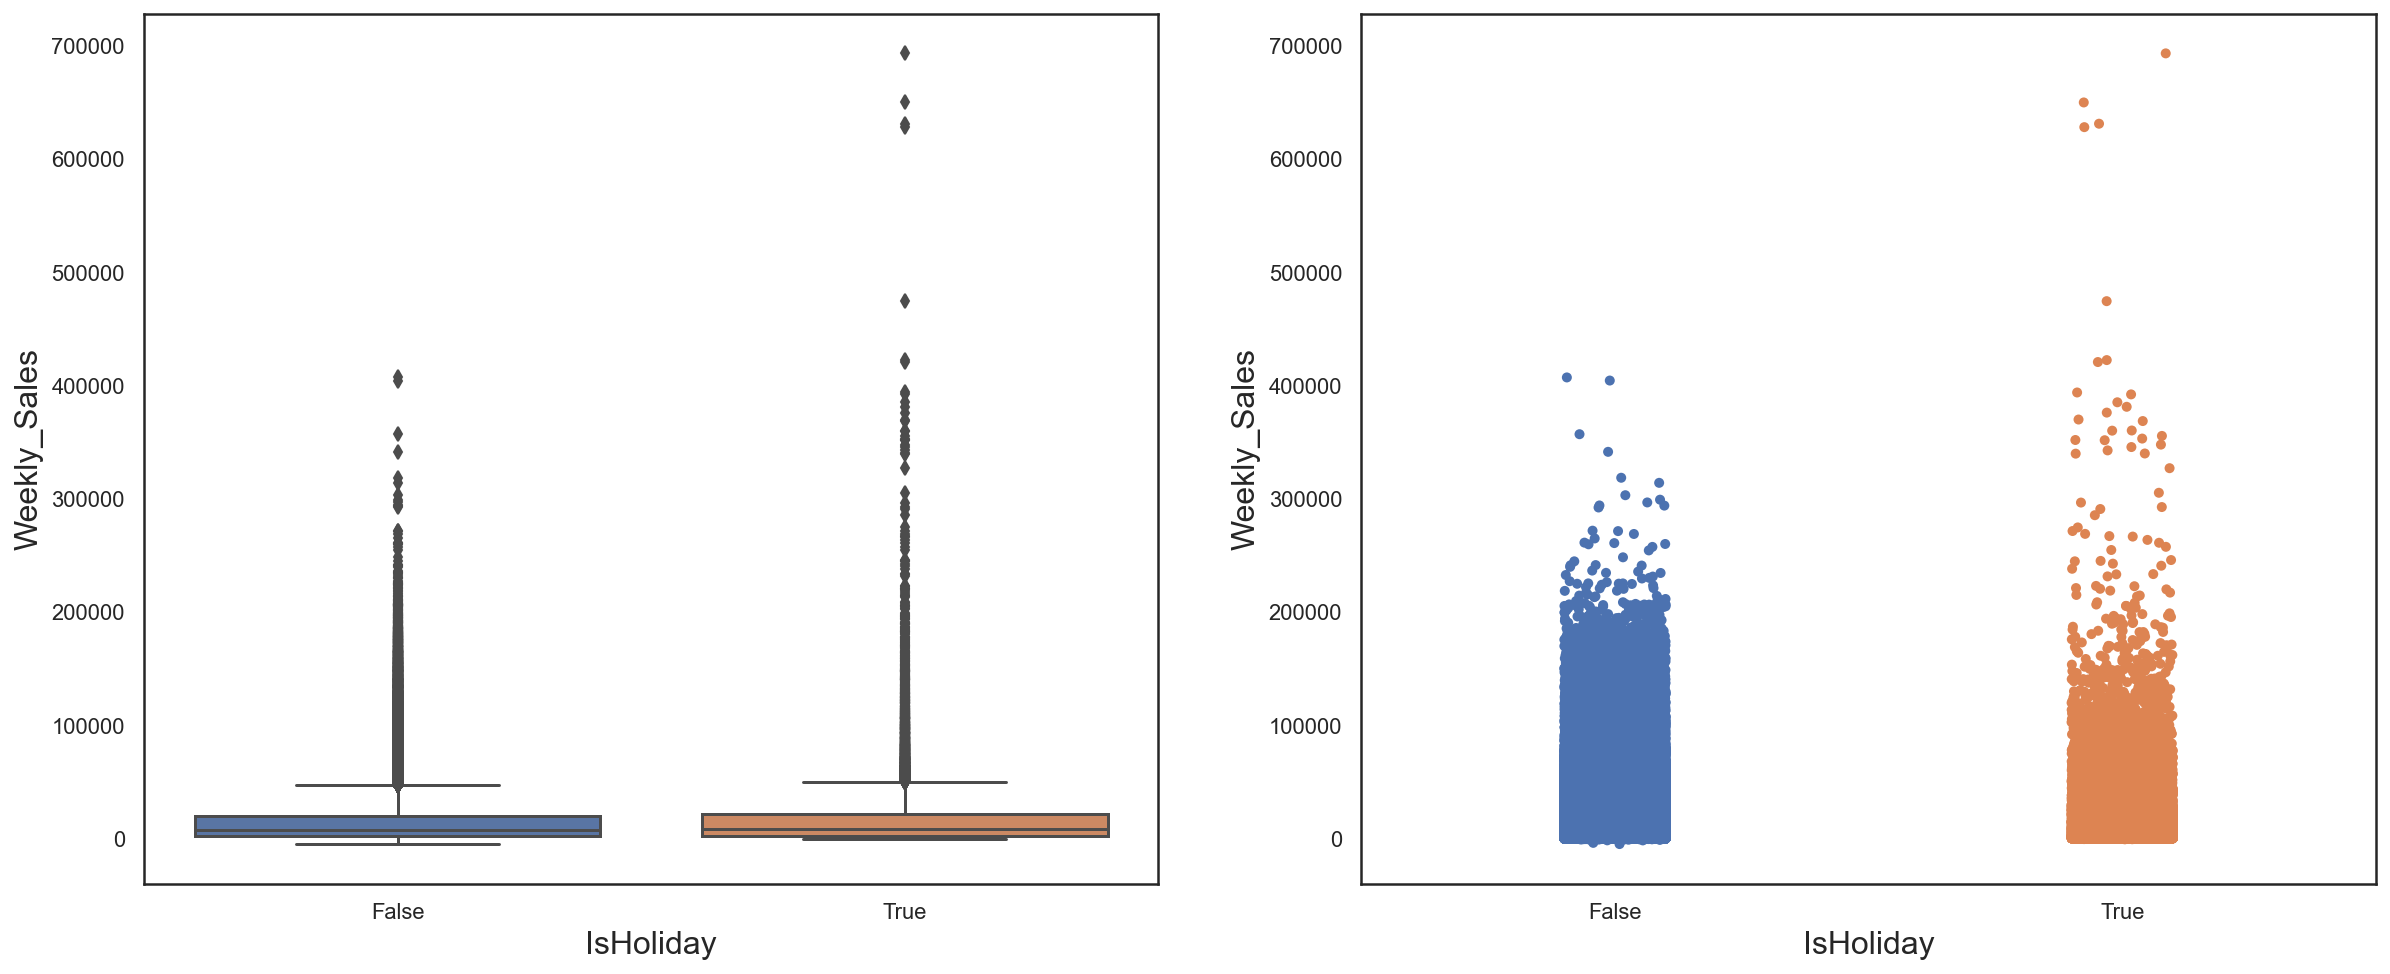

In [21]:
make_discrete_plot(train_detail, 'IsHoliday', 'Weekly_Sales')

* 공휴일 주간에 더 많은 판매량을 기록한 데이터들이 존재하는 모습을 볼 수 있다.

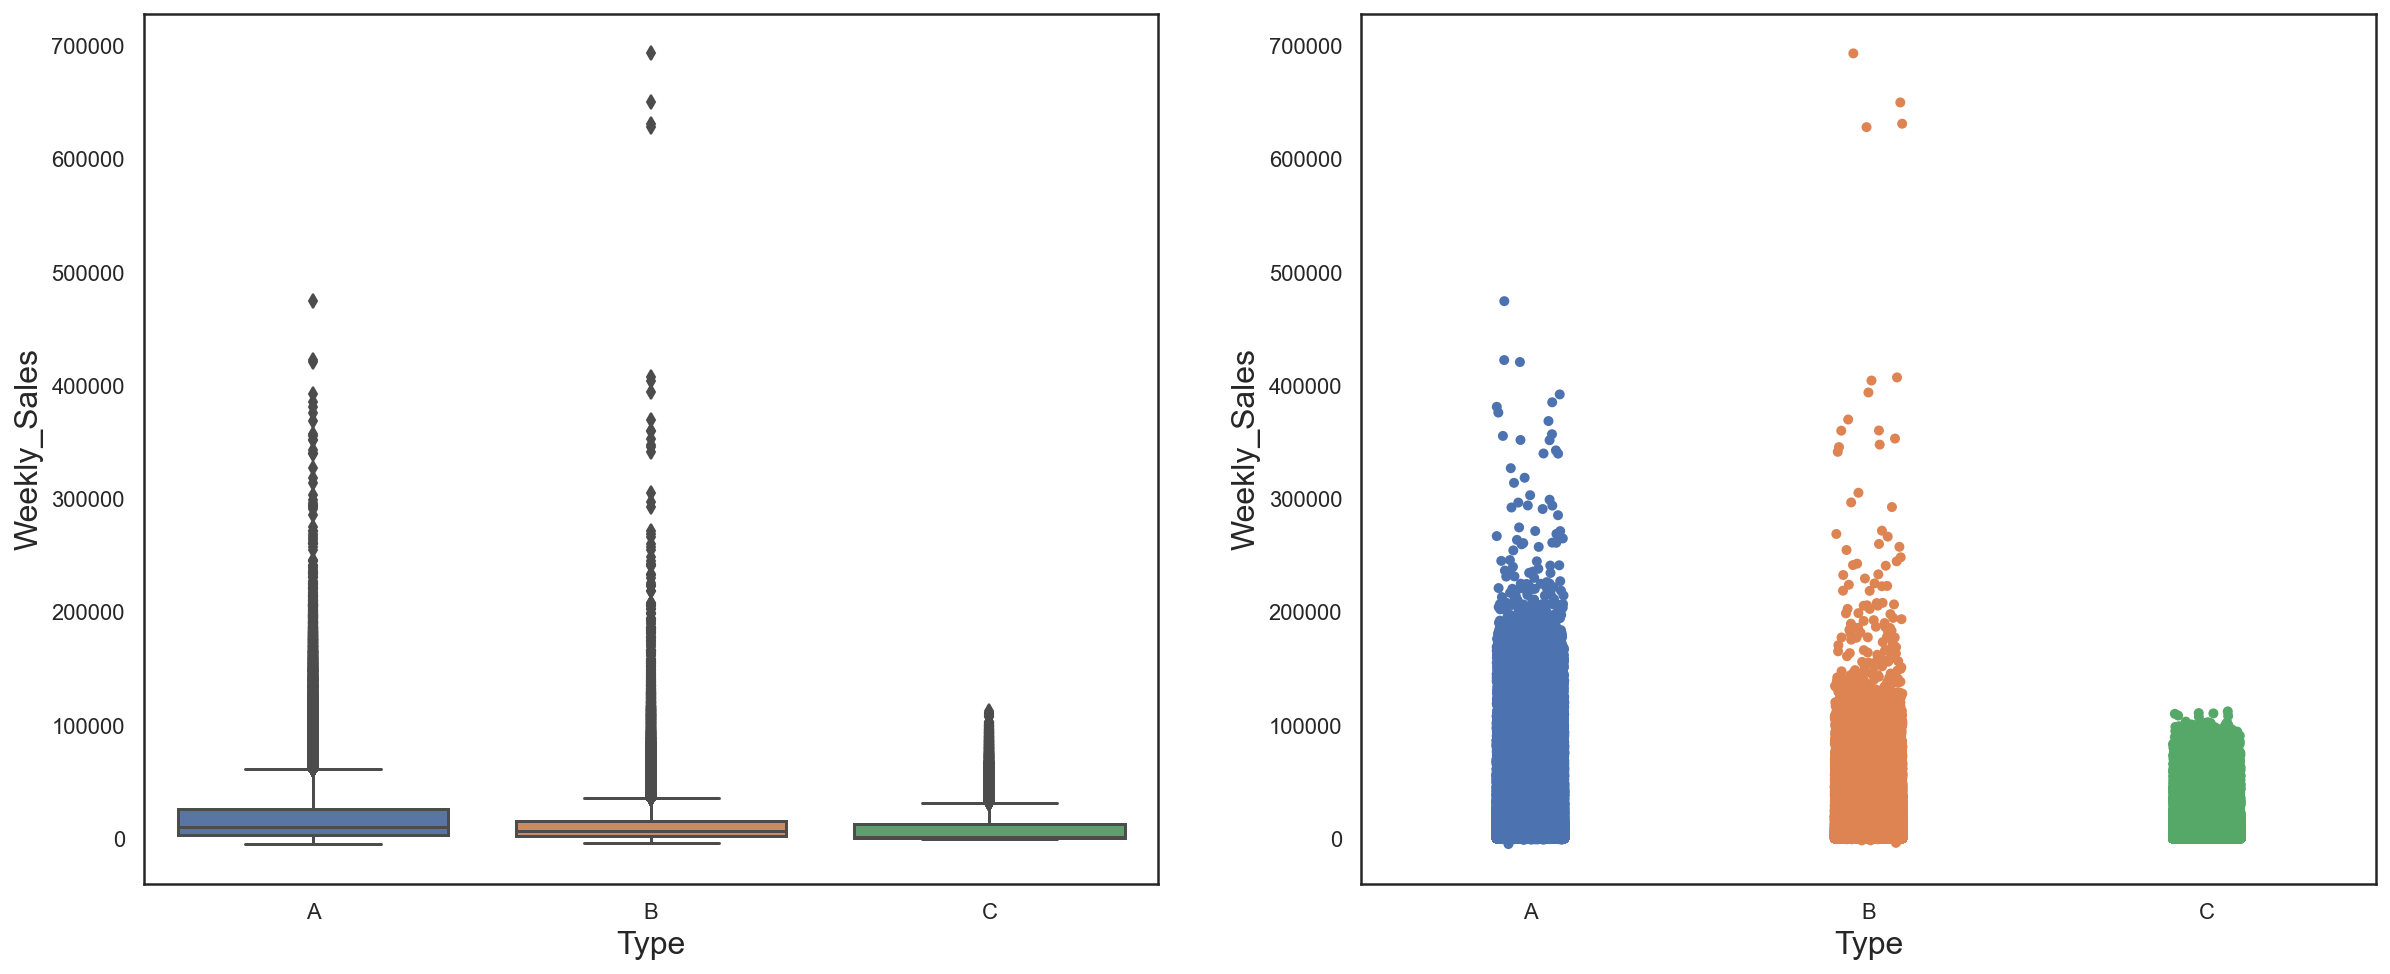

In [22]:
make_discrete_plot(train_detail, 'Type', 'Weekly_Sales')

* Type B의 경우가 더 많은 판매량이 기록한 데이터들이 존재하는 모습을 볼 수 있지만 판매량은 A>B>C 이라고 볼 수 있다.

In [28]:
train_detail['Type'] = train_detail['Type'].map(lambda x: 3 if x=='A' else (2 if x=='B' else 1))
test_detail['Type'] = test_detail['Type'].map(lambda x: 3 if x=='A' else (2 if x=='B' else 1))

#### Temperature와 Weekly_Sales 상관관계 분석

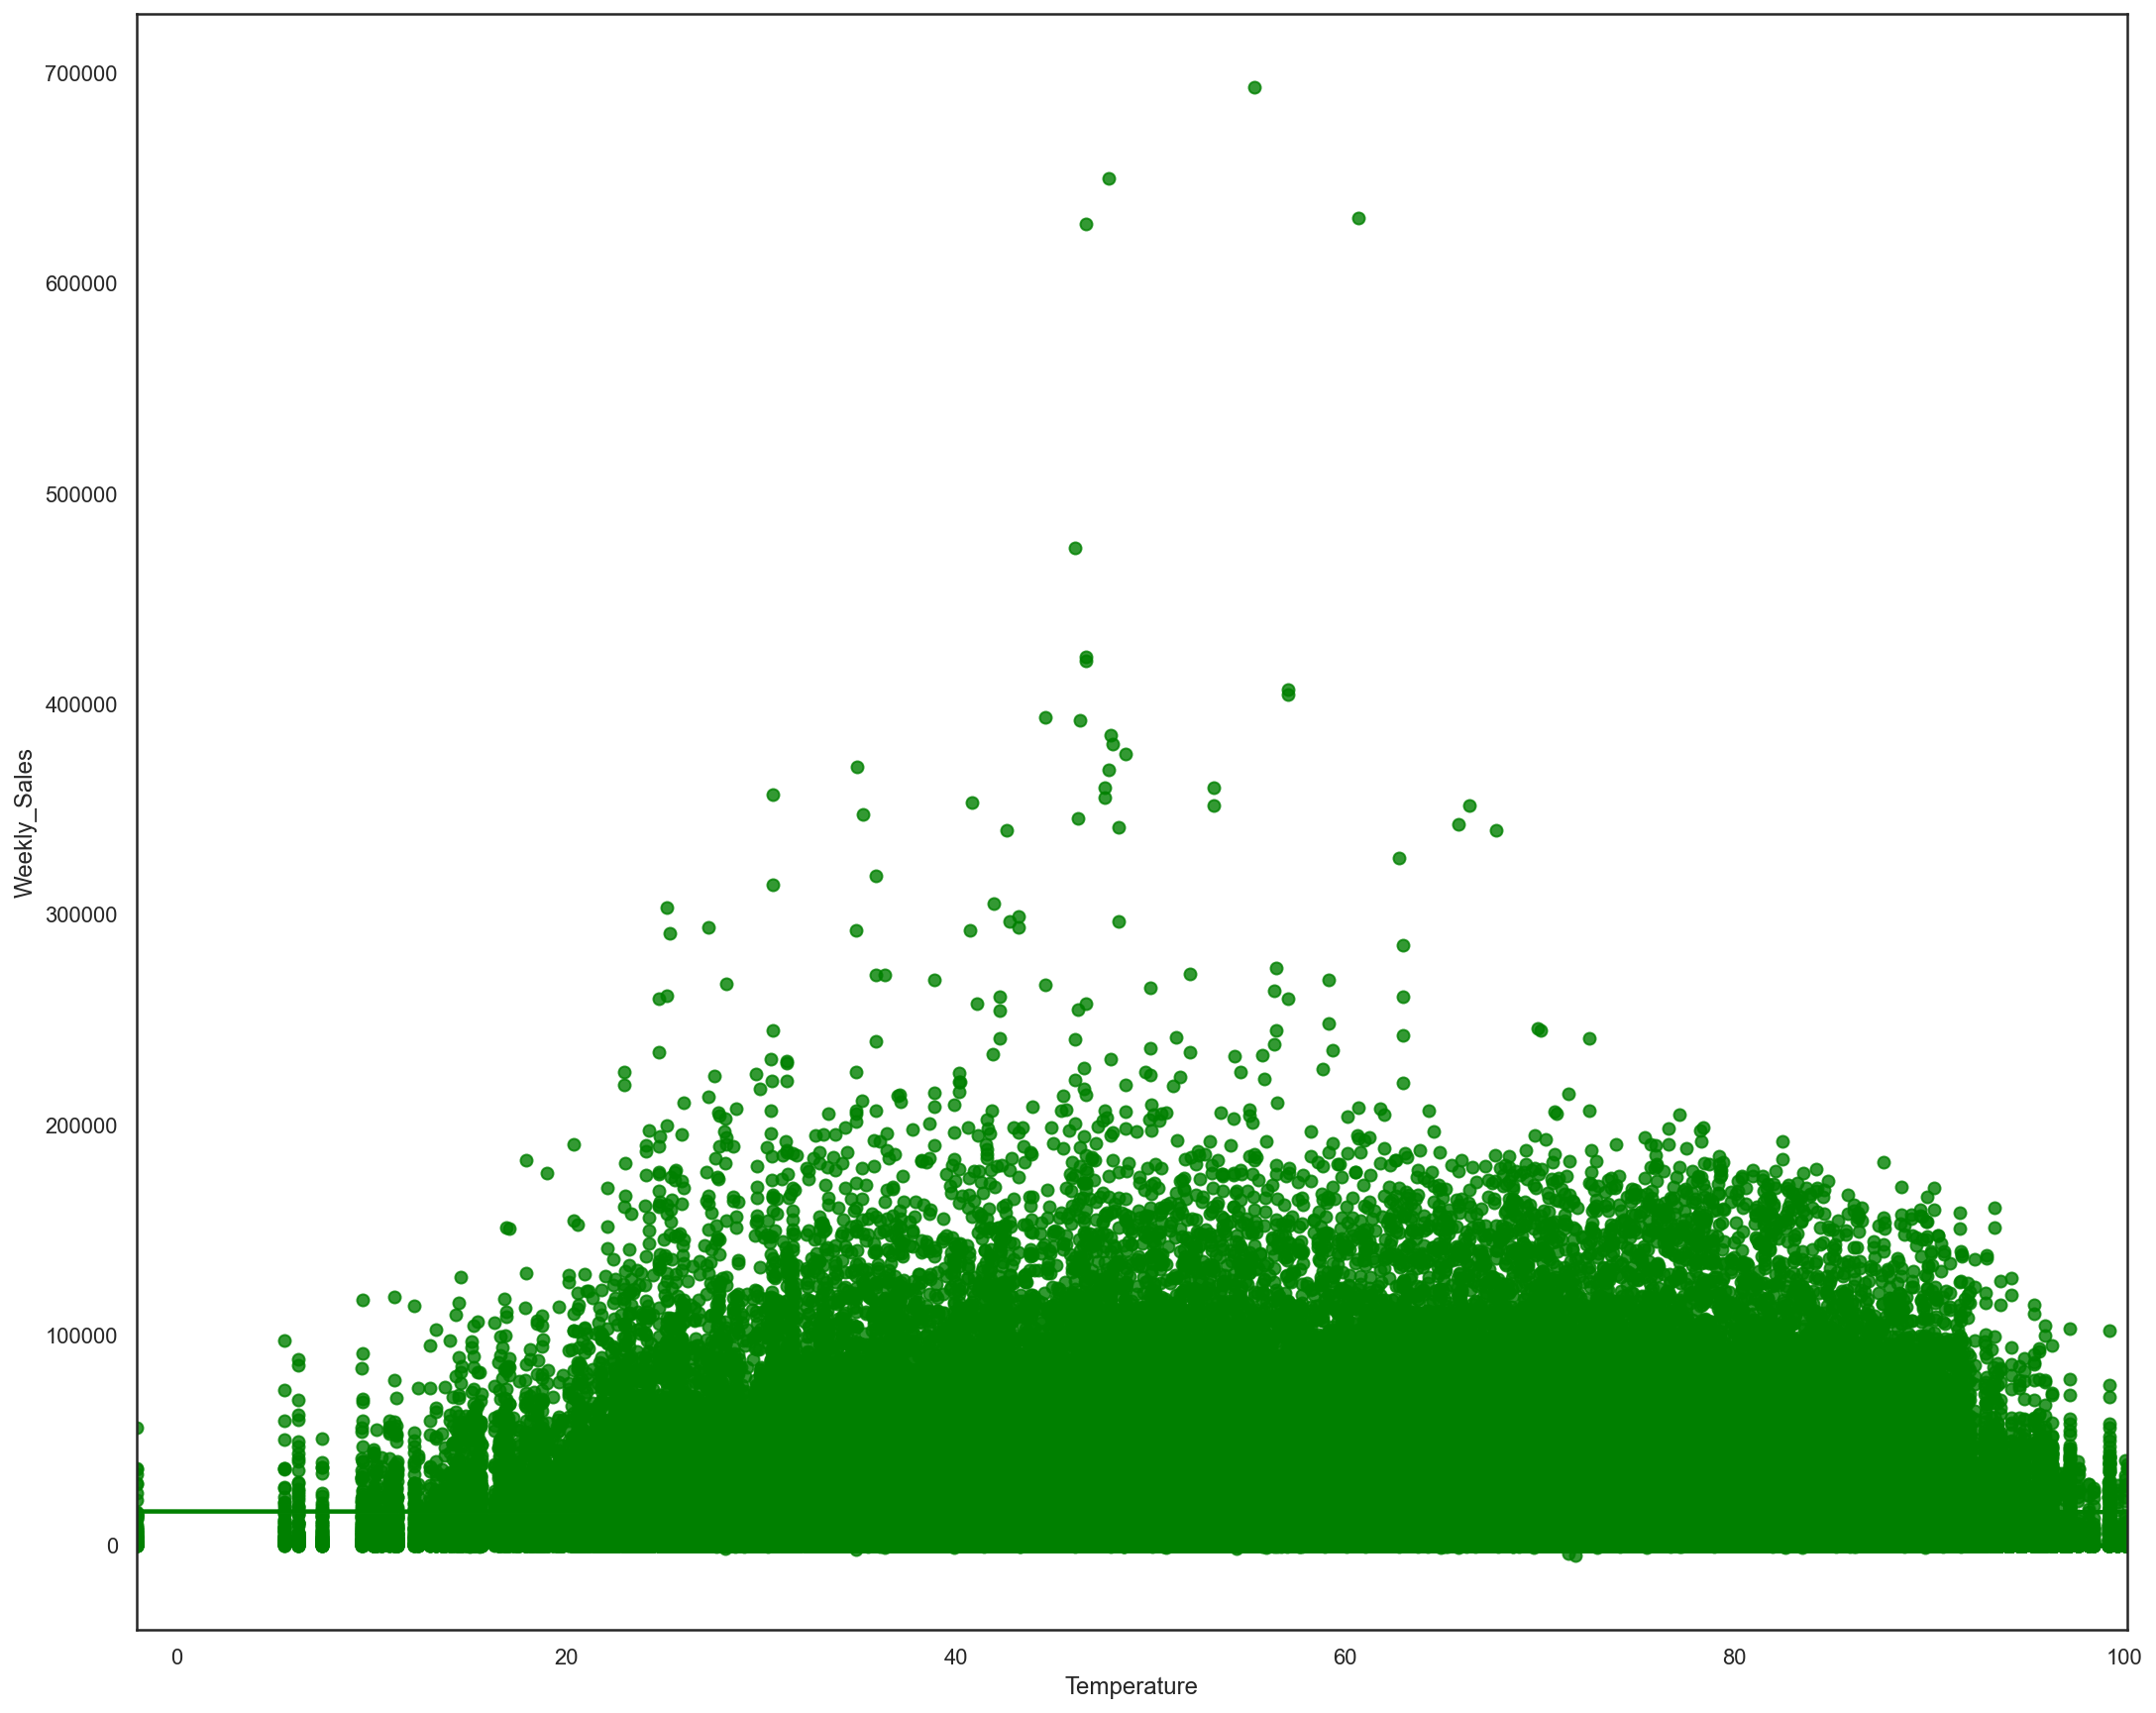

In [30]:
make_continuous_plot(train_detail, 'Temperature', 'Weekly_Sales')

* Temperature는 판매량과 거의 관계가 없는 모습이다. → feature 제거

In [31]:
train_detail.drop(columns=['Temperature'], inplace=True)
test_detail.drop(columns=['Temperature'], inplace=True)

#### CPI와 Weekly_Sales 상관관계 분석

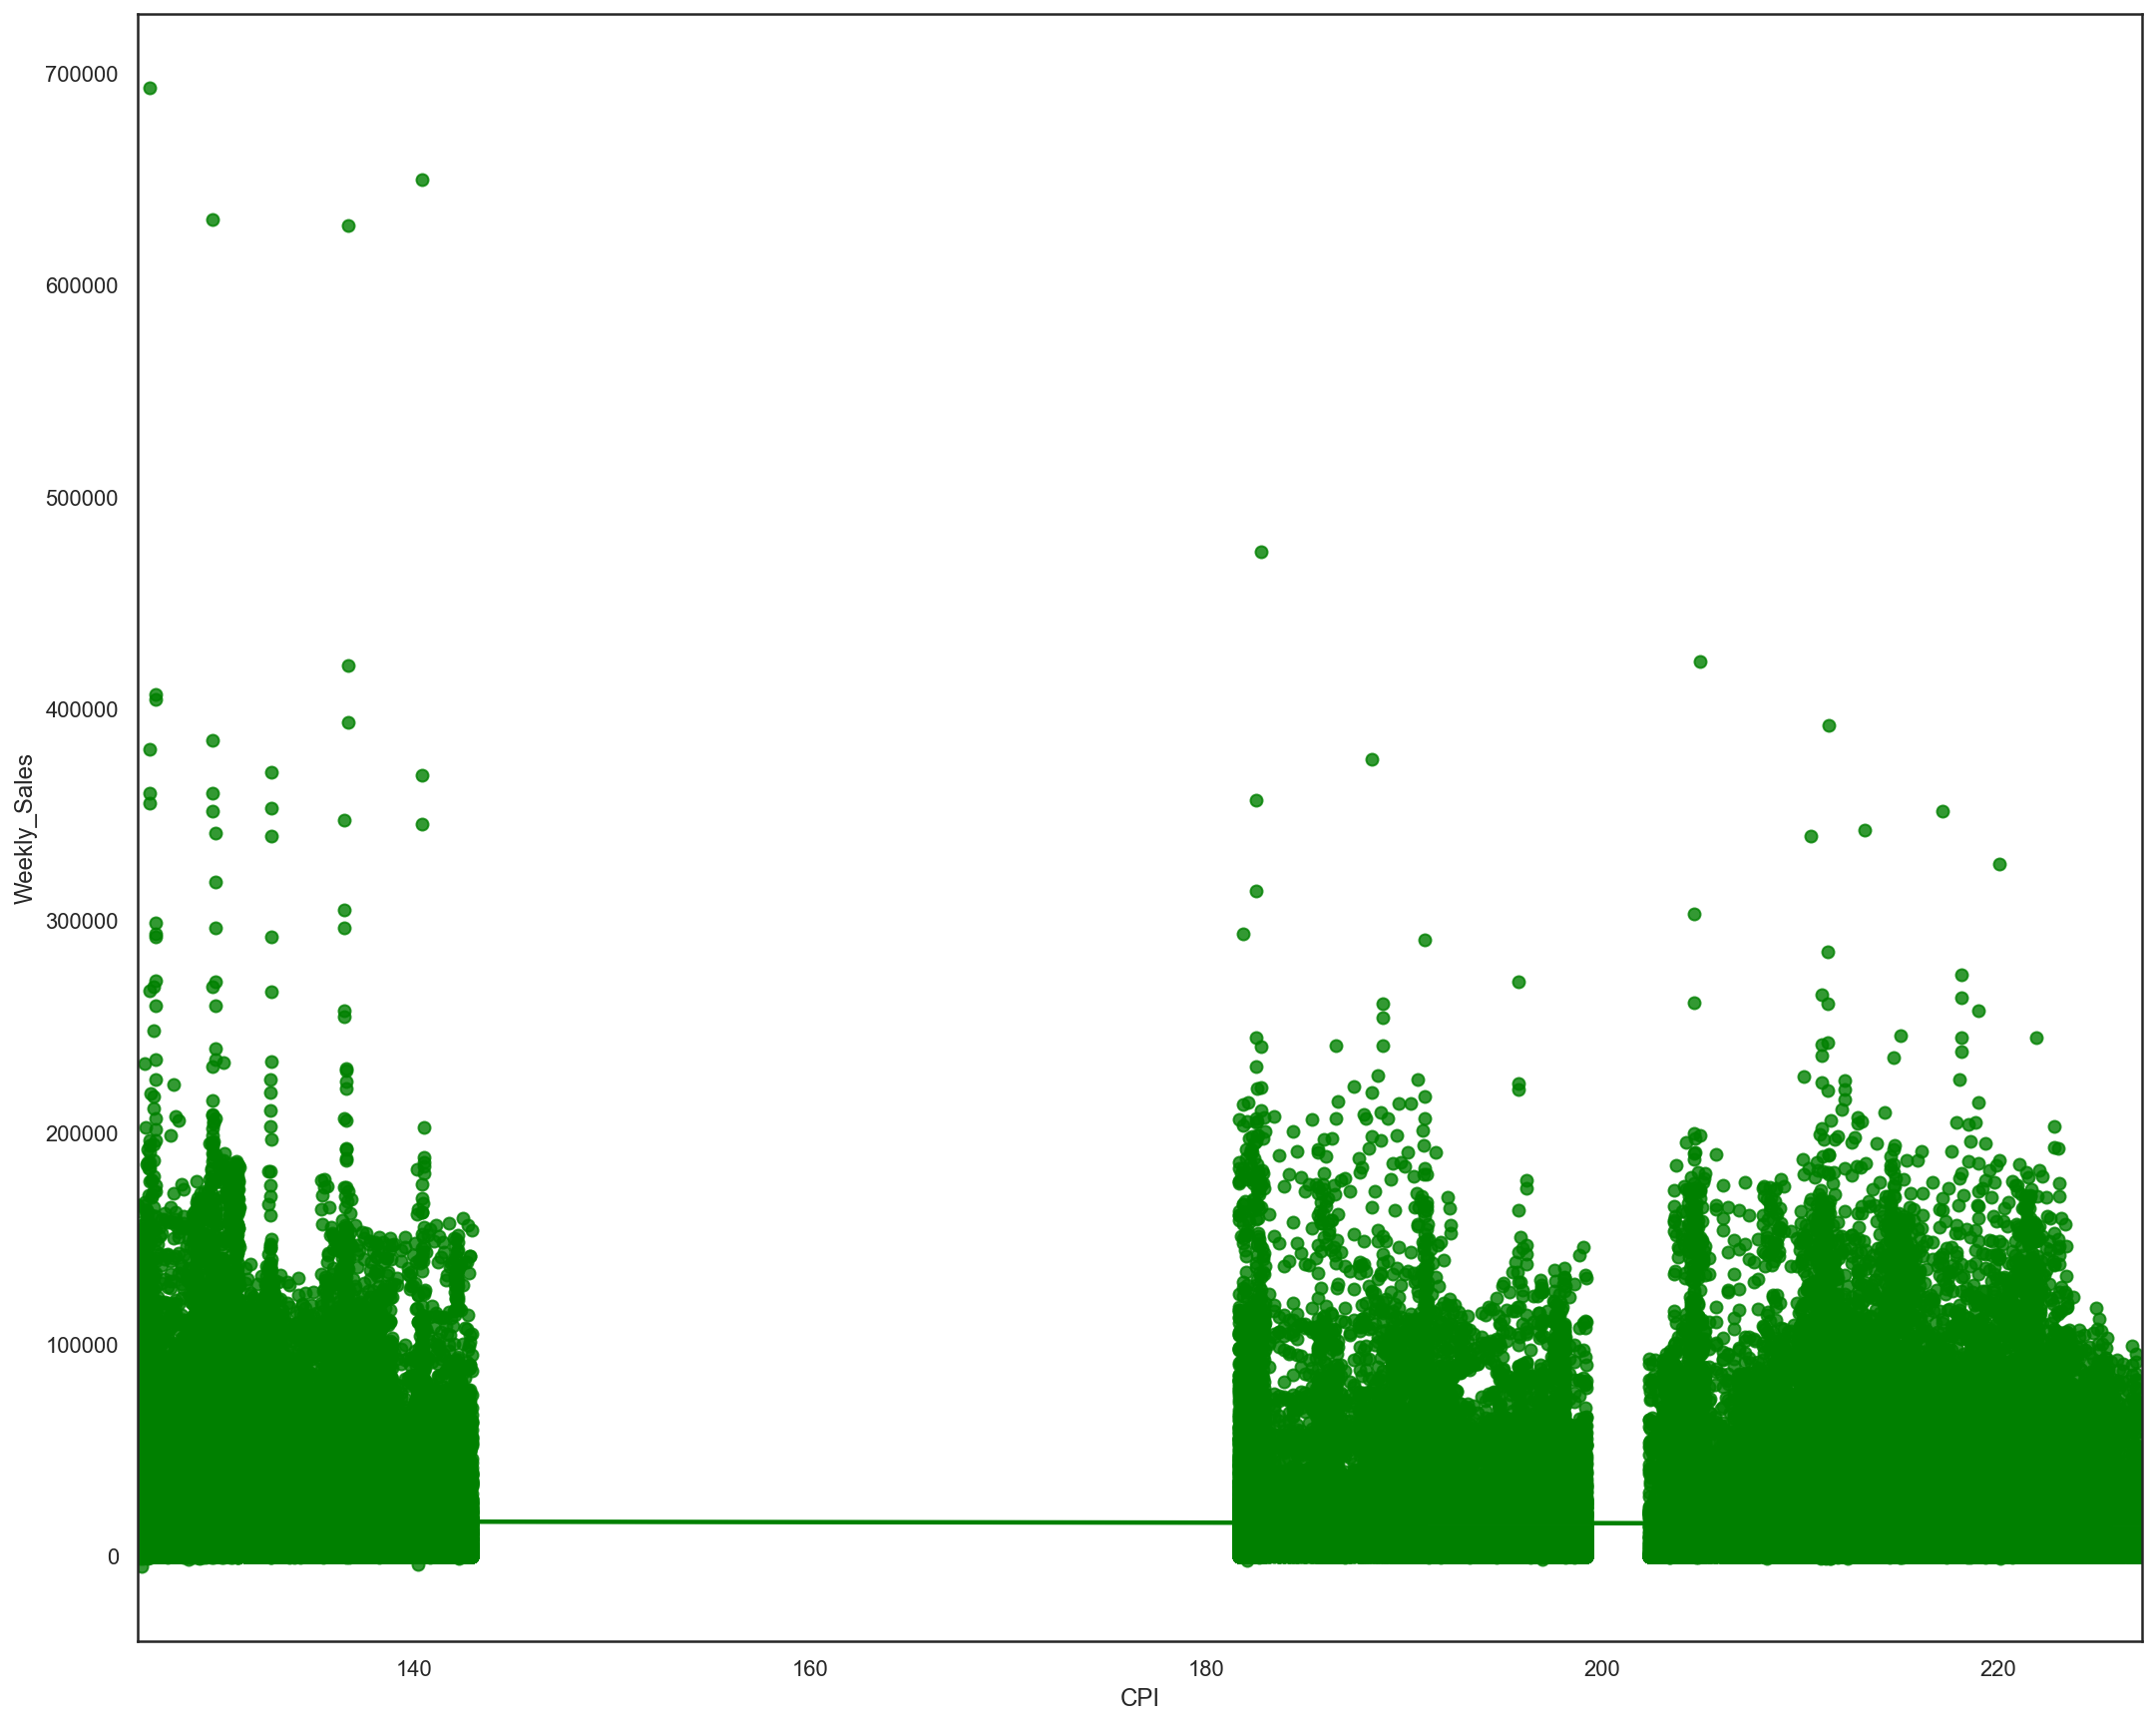

In [32]:
make_continuous_plot(train_detail, 'CPI', 'Weekly_Sales')

* CPI 또한 판매량과 거의 관계가 없는 모습이다. → feature drop

In [33]:
train_detail.drop(columns=['CPI'], inplace=True)
test_detail.drop(columns=['CPI'], inplace=True)

#### Unemployment와 Weekly_Sales 상관관계 분석

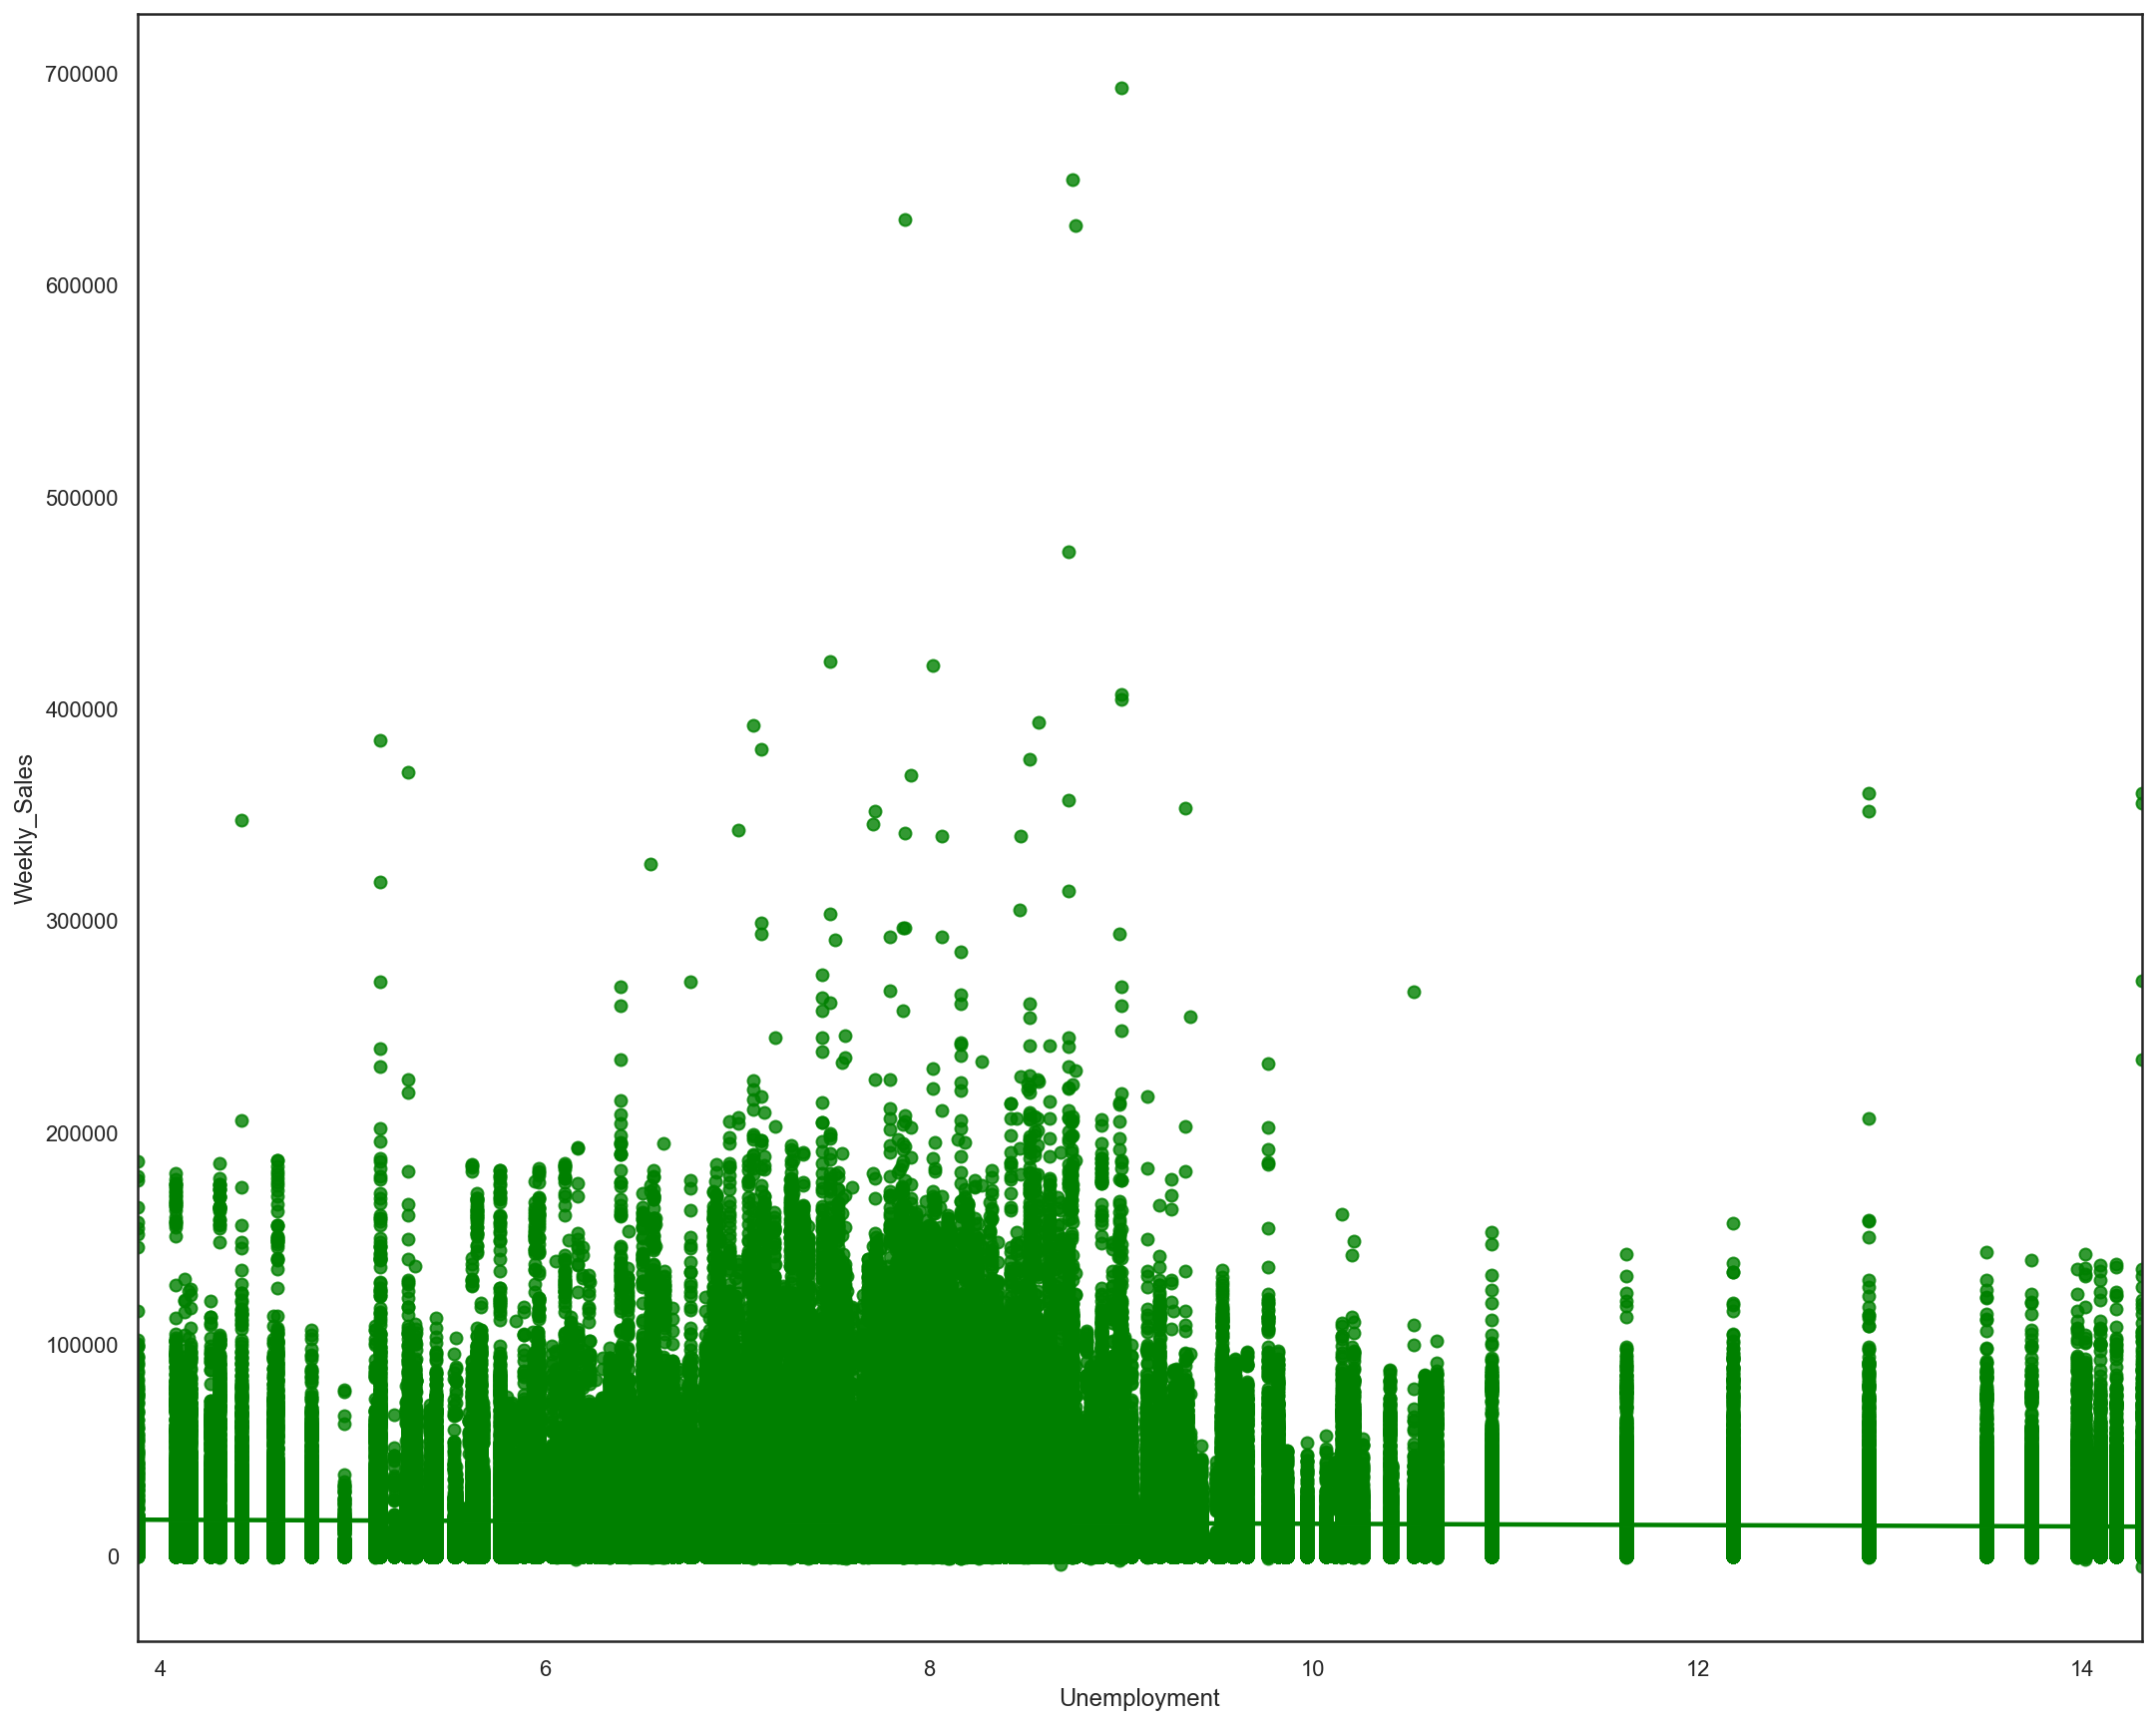

In [35]:
make_continuous_plot(train_detail, 'Unemployment', 'Weekly_Sales')

* Unemployment 또한 판매량과 거의 관계가 없는 모습이다. → feature drop

In [36]:
train_detail.drop(columns=['Unemployment'], inplace=True)
test_detail.drop(columns=['Unemployment'], inplace=True)

#### Size와 Weekly_Sales 상관관계 분석

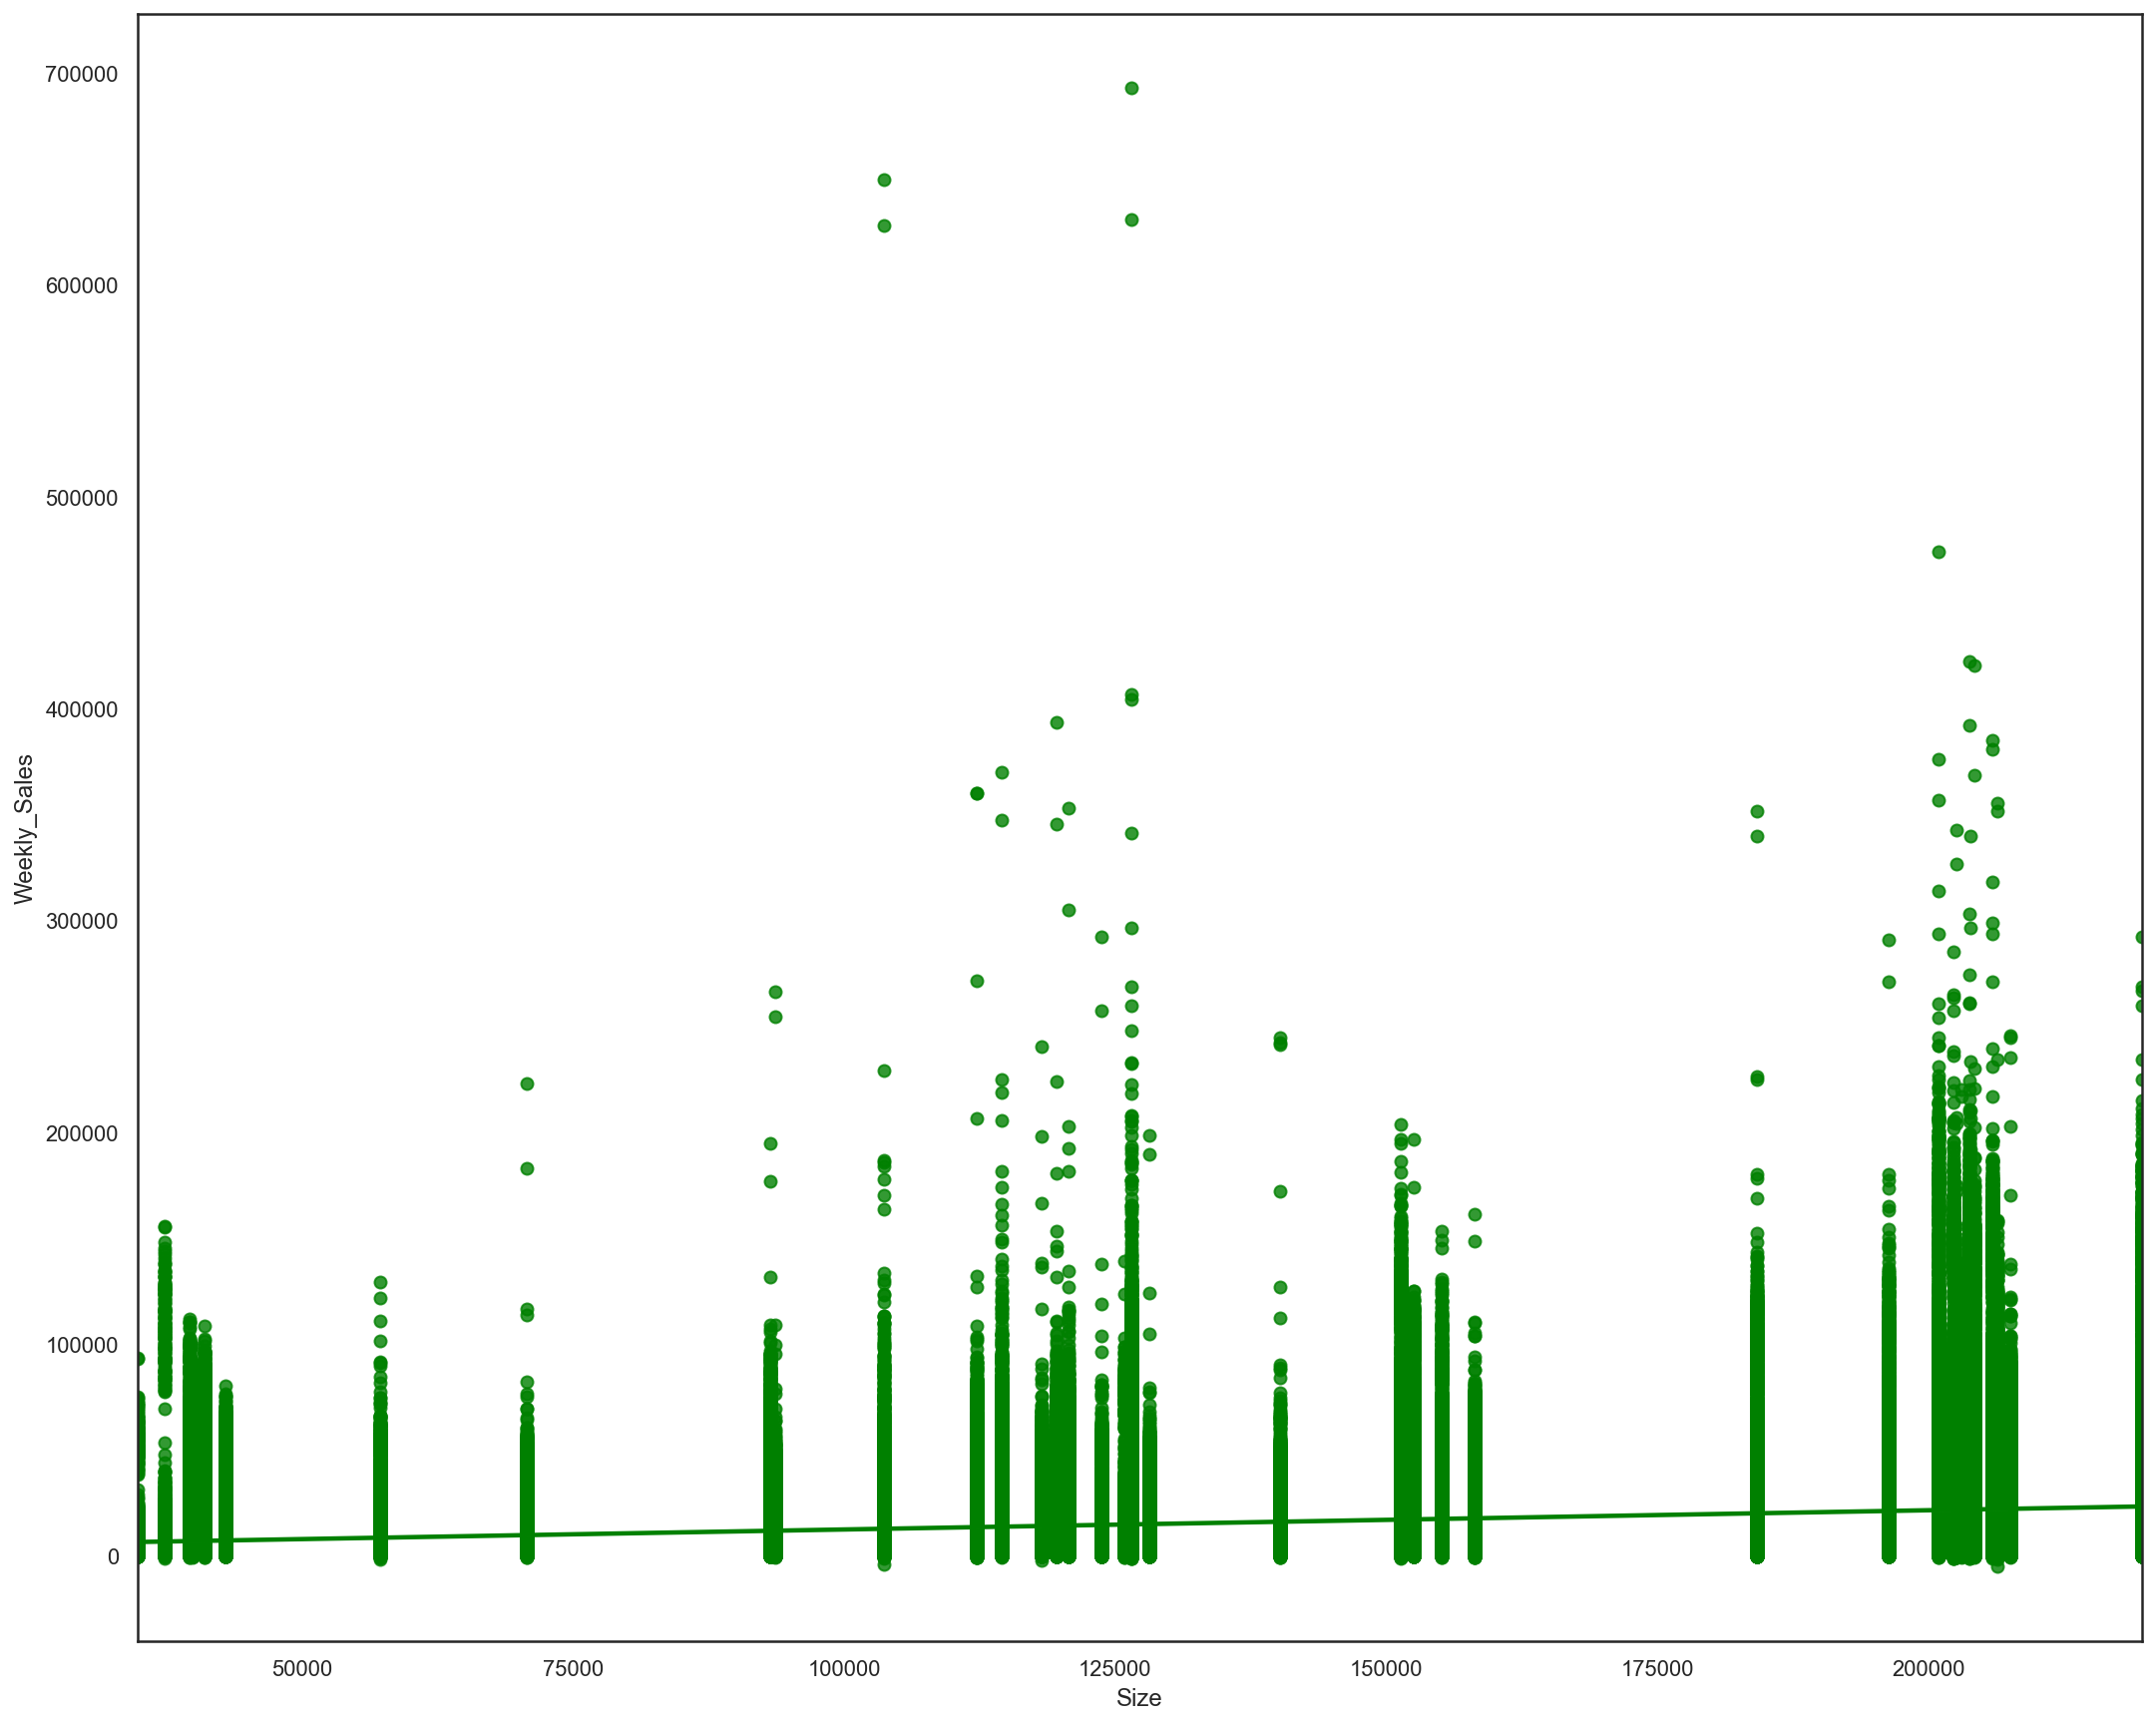

In [42]:
make_continuous_plot(train_detail ,'Size', 'Weekly_Sales')

* Size는 판매량과 상관관계를 가지는 모습을 볼 수 있다.

## ✍ 머신러닝을 이용한 예측
성능평가지표 : $WMAE = \frac{1}{\sum w_i}\sum_{i=1}^n{w_i|y_i-\hat{y_i}|}$
여기서
* n : # of rows
* $\hat{y_i} : predicted sales$
* ${y_i}$ : actual sales
* $w_i$ : weights, 만약 휴일주이면 w=5 아니면 1

#### loss function 정의

In [50]:
def WMAE(df, real, predicted):
    weights = df['IsHoliday'].map(lambda x: 5 if x==True else 1)
    return np.round(np.sum(weights * abs(real-predicted))/(np.sum(weights)), 2)

#### RandomForestRegressor 학습

* 학습 데이터 및 테스트 데이터 정의(데이터 분할 스킵)

In [65]:
x_train = train_detail.drop(columns=['Weekly_Sales', 'Date'])
y_train = train_detail['Weekly_Sales']

In [73]:
x_test = test_detail.drop(columns=['Date'])

* train

In [68]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

RandomForestRegressor()

* test

In [74]:
predicted = rf_model.predict(x_test)

In [75]:
predicted

array([30407.4811, 18914.1921, 19124.0997, ...,   696.0551,   770.7912,
         674.8274])

In [78]:
sample_submission['Weekly_Sales'] = predicted
sample_submission.to_csv('./result.csv', index=False)